In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(style="whitegrid")

In [114]:
data = '/users/ariar/PrimaryBid/V3TWSDMaster.csv'
df = pd.read_csv(data)

In [115]:
col_names = ['yearsInvesting','investmentHoldings','confidence','numOffers','TTV','ogLastTXN','lastTXN','offerNames','age','signUpDate','ogSignUpDate','broker','avgSubscribedAmount','firstOffer','clientSource']
df.columns = col_names

In [116]:
dfNew = df.copy()
dfNew["yearsInvesting"] = dfNew["yearsInvesting"].fillna("NA")
dfNew["investmentHoldings"] = dfNew["investmentHoldings"].fillna("NA")
dfNew["numOffers"] = dfNew["numOffers"].fillna(0)
dfNew["TTV"] = dfNew["TTV"].fillna(0)
dfNew["ogLastTXN"] = dfNew["ogLastTXN"].fillna("NA")
dfNew["lastTXN"] = dfNew["lastTXN"].fillna("NA")
dfNew["offerNames"] = dfNew["offerNames"].fillna("NA")
dfNew["signUpDate"] = dfNew["signUpDate"].fillna("NA")
dfNew["ogSignUpDate"] = dfNew["ogSignUpDate"].fillna("NA")
dfNew["broker"] = dfNew["broker"].fillna("NA")
dfNew["avgSubscribedAmount"] = dfNew["avgSubscribedAmount"].fillna(0)
dfNew["firstOffer"] = dfNew["firstOffer"].fillna("N/A")
dfNew["clientSource"] = dfNew["clientSource"].fillna("Unknown")
conMean = dfNew["confidence"].mean()
ageMean = dfNew["age"].mean()
dfNew["age"] = dfNew["age"].fillna(int(ageMean)) #age replaced with mean
dfNew["confidence"] = dfNew["confidence"].fillna(conMean) #confidence replaced with mean


In [117]:
dfNew.describe().T

count          mean           std   min   25%     50%  \
confidence           866.0      3.344111      1.160753   0.0   3.0    3.00   
numOffers            866.0      4.974596      9.706648   0.0   0.0    1.00   
TTV                  866.0  17550.256859  91712.732629   0.0   0.0  817.85   
age                  866.0     49.845266     14.462839  18.0  39.0   49.00   
avgSubscribedAmount  866.0  17110.345970  91570.848908   0.0   0.0  749.85   

                          75%         max  
confidence              4.000        5.00  
numOffers               5.000       89.00  
TTV                  5091.065  2127270.53  
age                    61.000       94.00  
avgSubscribedAmount  4753.030  2127270.53

In [118]:
dfNew.describe(include='O').T

count unique                         top freq
yearsInvesting       866      6            10 or more years  369
investmentHoldings   866      8          ¬£50,000-¬£249,999  191
ogLastTXN            866    106                          NA  312
lastTXN              866    106                          NA  312
offerNames           866    404                          NA  312
signUpDate           866    300                  2021-03-09   55
ogSignUpDate         866    300                    3/9/2021   55
broker               866     31                          NA  308
firstOffer           866     49                         N/A  455
clientSource         866      4  Retail One-off Transaction  268

In [119]:
categorical = [var for var in dfNew.columns if dfNew[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['yearsInvesting', 'investmentHoldings', 'ogLastTXN', 'lastTXN', 'offerNames', 'signUpDate', 'ogSignUpDate', 'broker', 'firstOffer', 'clientSource']


In [120]:
numerical = [var for var in dfNew.columns if dfNew[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['confidence', 'numOffers', 'TTV', 'age', 'avgSubscribedAmount']


In [121]:
count = 0
active = 0
for k in dfNew["offerNames"]:
    if "," in str(k):
#         print(str(k))
        active +=1
        
    count +=1
print("Users who have made two or more deals: "+ str(active))

Users who have made two or more deals: 369


In [122]:
count = 0
inactive = 0
for k in dfNew["offerNames"]:
    if "," not in str(k) and "-" not in str(k):
#         print(str(k))
        inactive +=1
        
    count +=1
print("Users who have made no deals: "+ str(inactive))

Users who have made no deals: 312


In [123]:
oneDeal = 0
for k in dfNew["offerNames"]:
    if "," not in str(k) and "-" in str(k):
#         print(str(k))
        oneDeal +=1
        
print("Users who have made one deal: "+ str(oneDeal))

Users who have made one deal: 185


In [124]:
total = 0
for k in dfNew["offerNames"]:
#     if "," not in str(k):
#         print(str(k))
#         inactive +=1
        
    total +=1
print(total)

866


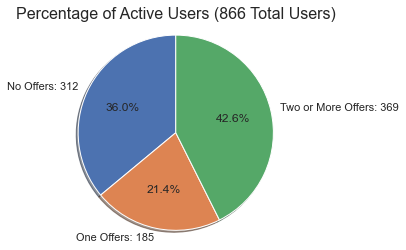

In [125]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Offers: '+str(inactive), 'One Offers: '+str(oneDeal), "Two or More Offers: "+str(active)
sizes = [inactive,oneDeal,active]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Active Users (" +str(total)+" Total Users)",fontsize=16)


plt.show()


In [126]:
#266 
commOffers = 0
meal = 0
roo = 0
art = 0
mcg = 0
pbee = 0
for k in dfNew["offerNames"]:
    if "MCG" in str(k):
        mcg +=1
        commOffers +=1
    elif "ART" in str(k):
        commOffers +=1
        art +=1
    elif "PBEE" in str(k):
        commOffers +=1
        pbee +=1
    elif "MEAL" in str(k):
        meal += 1
        commOffers +=1
    elif "ROO" in str(k):
        roo +=1
        commOffers +=1
    else:
        pass
print("Total: "+str(commOffers))
print("MEAL: "+str(meal))
print("ROO: "+str(roo))
print("ART: "+str(art))
print("MCG: "+str(mcg))
print("PBEE: "+str(pbee))

Total: 266
MEAL: 29
ROO: 179
ART: 28
MCG: 3
PBEE: 27


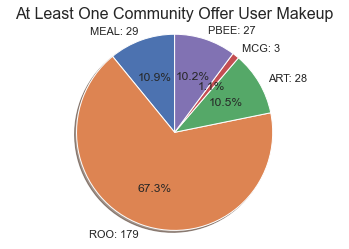

In [127]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'MEAL: '+str(meal), 'ROO: '+str(roo), "ART: "+str(art),'MCG: '+str(mcg), 'PBEE: '+str(pbee)
sizes = [meal,roo,art,mcg,pbee]
explode = (0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("At Least One Community Offer User Makeup",fontsize=16)


plt.show()

MEAL: 32
ROO: 209
ART: 28
MCG: 3
PBEE: 30


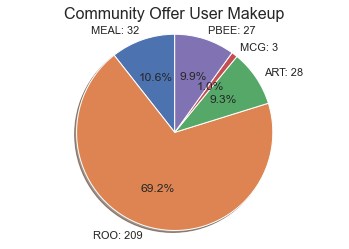

In [128]:
#266 
commOffers2 = 0
meal2 = 0
roo2 = 0
art2 = 0
mcg2 = 0
pbee2 = 0
for k in df["offerNames"]:
    if "MCG" in str(k):
        mcg2 +=1
    if "ART" in str(k):
        art2 +=1
    if "PBEE" in str(k):
        pbee2 +=1
    if "MEAL" in str(k):
        meal2 += 1
    if "ROO" in str(k):
        roo2 +=1
    else:
        pass
# print("Total: "+str(commOffers2))
print("MEAL: "+str(meal2)) #3 more
print("ROO: "+str(roo2)) #30 more
print("ART: "+str(art2)) #no additional
print("MCG: "+str(mcg2)) #no additional
print("PBEE: "+str(pbee2))#3 additional

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'MEAL: '+str(meal2), 'ROO: '+str(roo2), "ART: "+str(art2),'MCG: '+str(mcg2), 'PBEE: '+str(pbee)
sizes = [meal2,roo2,art2,mcg2,pbee2]
explode = (0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Community Offer User Makeup",fontsize=16)


plt.show()

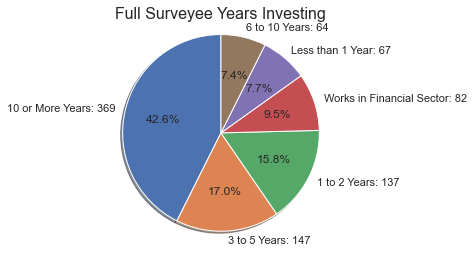

In [129]:
#266 
more10 = 0
threeToFive = 0
oneToTwo = 0
finSect = 0
lessOne = 0
sixToTen = 0
for k in df["yearsInvesting"]:
    if "more" in str(k):
        more10 +=1
    elif "3" in str(k):
        threeToFive +=1
    elif "2" in str(k):
        oneToTwo +=1
    elif "fin" in str(k):
        finSect += 1
    elif "Less" in str(k):
        lessOne +=1
    else:
        sixToTen +=1
# print("Total: "+str(commOffers2))
# print("MEAL: "+str(more10)) #3 more
# print("ROO: "+str(threeToFive)) #30 more
# print("ART: "+str(oneToTwo)) #no additional
# print("MCG: "+str(finSect)) #no additional
# print("PBEE: "+str(lessOne))#3 additional

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '10 or More Years: '+str(more10), '3 to 5 Years: '+str(threeToFive), "1 to 2 Years: "+str(oneToTwo),'Works in Financial Sector: '+str(finSect), 'Less than 1 Year: '+str(lessOne), '6 to 10 Years: '+str(sixToTen)
sizes = [more10,threeToFive,oneToTwo,finSect,lessOne,sixToTen]
explode = (0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Full Surveyee Years Investing",fontsize=16)


plt.show()

In [130]:
#mobile vs retail clients
mobile = 0
retail = 0
web = 0
unknown = 0
for k in dfNew["clientSource"]:
    if "Mobile" in str(k):
        mobile +=1
print(mobile)

for k in dfNew["clientSource"]:
    if "One" in str(k):
        retail +=1
print(retail)
for k in dfNew["clientSource"]:
    if "Web" in str(k):
        web +=1
print(web)
for k in dfNew["clientSource"]:
    if "Unknown" in str(k):
        unknown +=1
print(unknown)

144
268
215
239


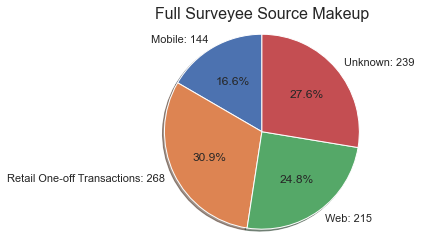

In [131]:
labels = 'Mobile: '+str(mobile), 'Retail One-off Transactions: '+str(retail), "Web: "+str(web),'Unknown: '+str(unknown)
sizes = [mobile,retail,web,unknown]
explode = (0, 0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Full Surveyee Source Makeup",fontsize=16)


plt.show()

[Text(0, 0, '10 or more years'),
 Text(1, 0, '3 to 5 years'),
 Text(2, 0, '1 to 2 years'),
 Text(3, 0, 'I work in the financial sector'),
 Text(4, 0, 'Less than 1 year'),
 Text(5, 0, '6 to 10 years')]

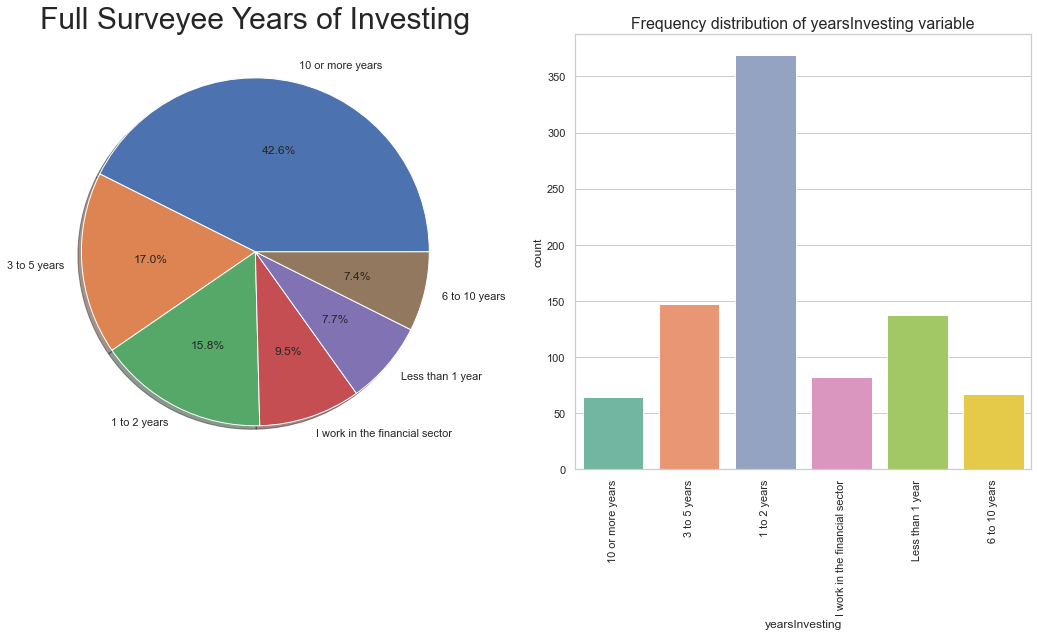

In [132]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = dfNew["yearsInvesting"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("Full Surveyee Years of Investing",fontsize=30)
ax[0].set_ylabel("")


# f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="yearsInvesting", data=dfNew, palette="Set2")
ax[1].set_title("Frequency distribution of yearsInvesting variable",fontsize=16)
ax[1].set_xticklabels(dfNew.yearsInvesting.value_counts().index, rotation=90)
# plt.show()

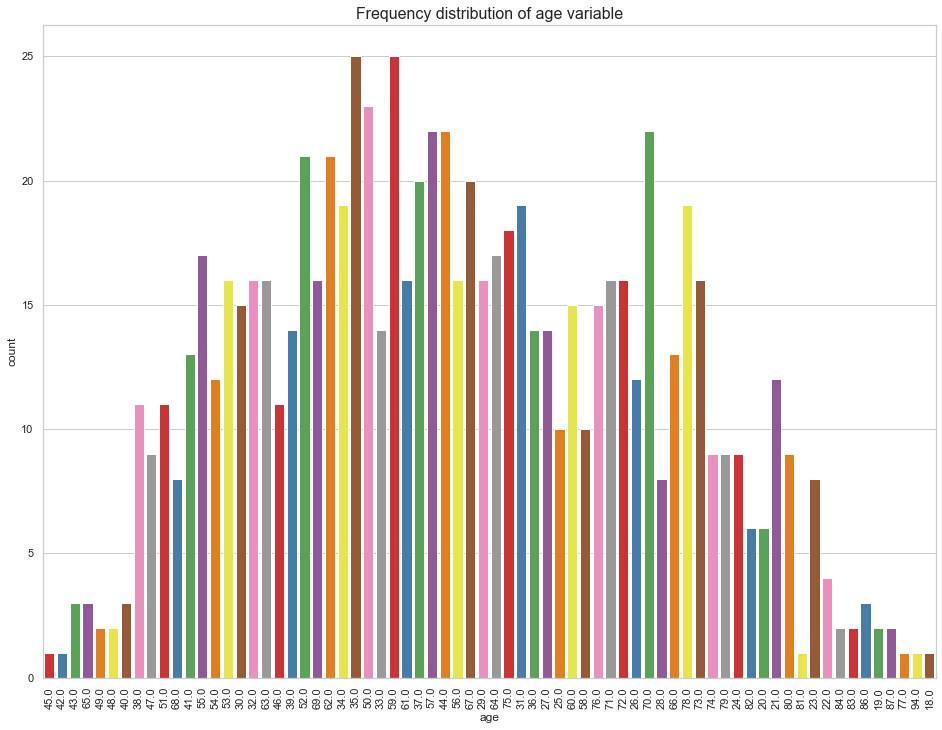

In [133]:
# visualize frequency distribution of `broker` variable


f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="age", data=df, palette="Set1")
ax.set_title("Frequency distribution of age variable",fontsize = 16)
ax.set_xticklabels(df.age.value_counts().index, rotation=90)
plt.show()

#title, labels, ticker, legend, write numbers on top of bar

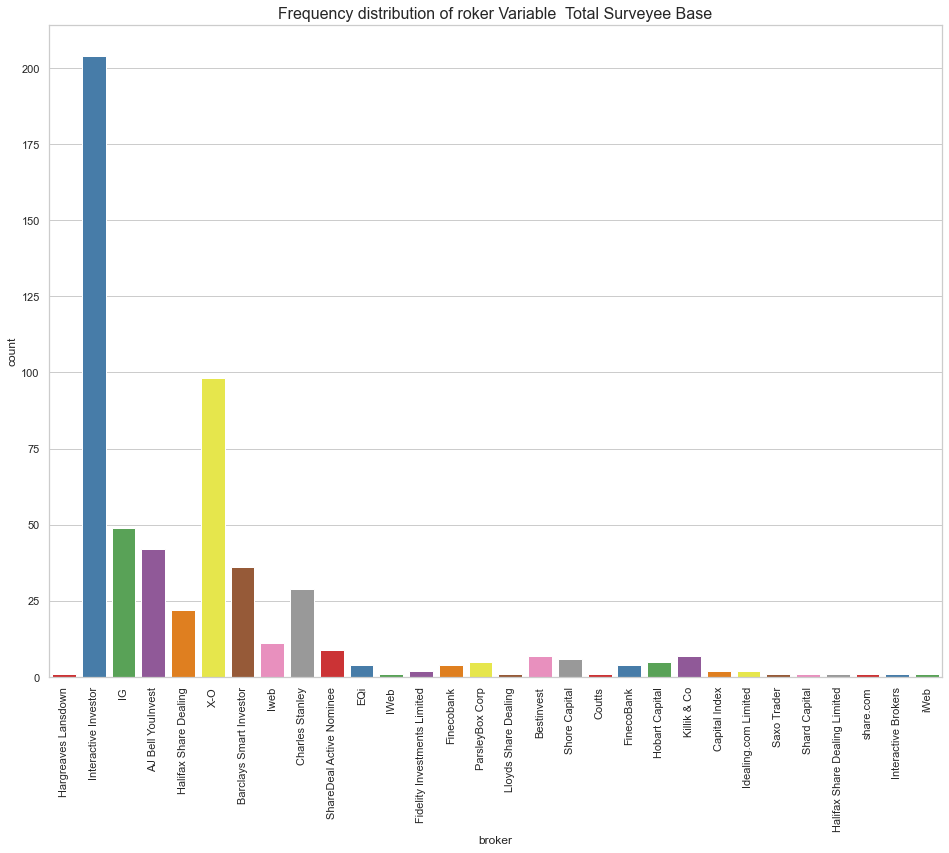

In [134]:
# visualize frequency distribution of `broker` variable


f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="broker", data=df, palette="Set1")
ax.set_title("Frequency distribution of roker Variable  Total Surveyee Base",fontsize = 16)
ax.set_xticklabels(df.broker.value_counts().index, rotation=90)
plt.show()

#title, labels, ticker, legend, write numbers on top of bar

In [135]:
# changing the precision of the 'Age' column
# df['age']= df['age'].astype(str).apply(lambda x: x.replace('.0', ''))
# create a column for the age group.
dfNew['Age_group'] = ''
# group 1 is 18-30 people
dfNew['Age_group'] = np.where(
(dfNew['age'] <= 30) & (dfNew['age'] >= 18) , '18-30', dfNew['Age_group'])
# group 2 is 30-40 years people
dfNew['Age_group'] = np.where(
(dfNew['age'] <= 40) & (dfNew['age'] > 30) , '30-40', dfNew['Age_group'])
# group 3 is 40-50 years old
dfNew['Age_group'] =  np.where(
(dfNew['age'] <=50) & (dfNew['age'] > 40) , '40-50', dfNew['Age_group'])
# group 4 is 50-60 years old
dfNew['Age_group'] = np.where(
(dfNew['age'] <= 60) & (dfNew['age'] > 50), '50-60' , dfNew['Age_group'])
# group 5 is 60-70 years old
dfNew['Age_group'] = np.where(
(dfNew['age'] <=70)& (dfNew['age'] > 60),'60-70',dfNew['Age_group'])
# group 6 is 70-90 years old
dfNew['Age_group'] = np.where(
(dfNew['age'] <=100)& (dfNew['age'] > 70) , '70-100', dfNew['Age_group'])

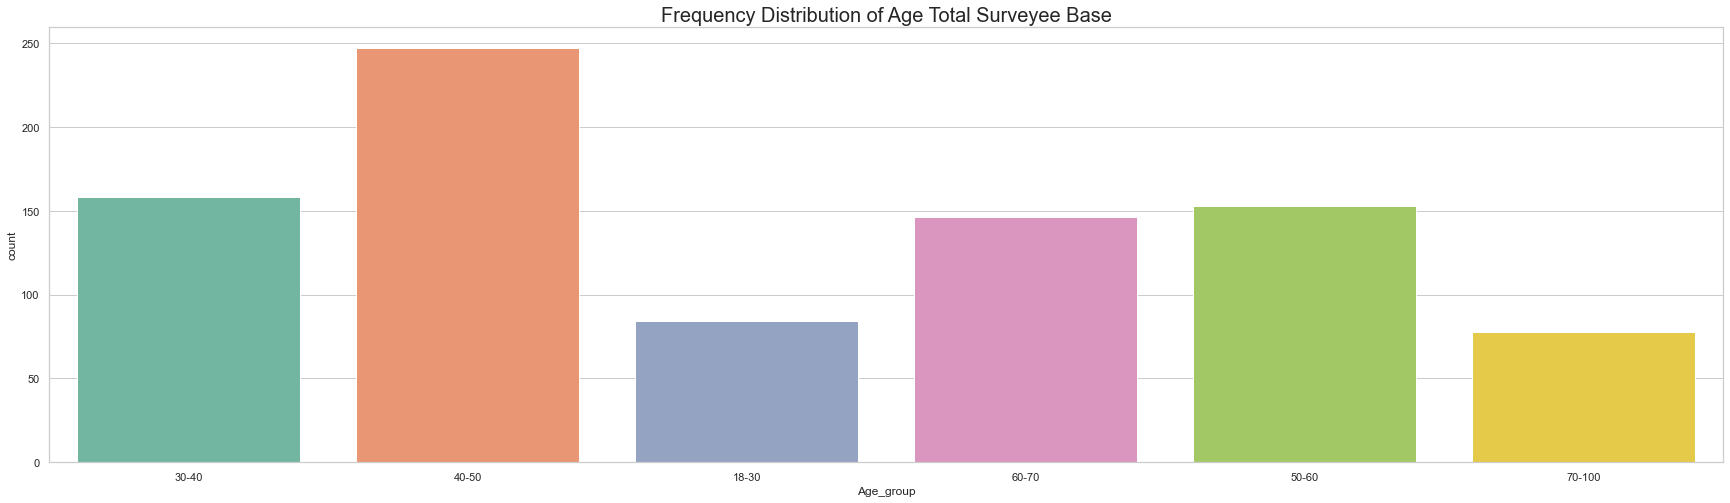

In [136]:
f, ax = plt.subplots(figsize=(30, 8))
ax = sns.countplot(x="Age_group", data=dfNew, palette="Set2")
ax.set_title("Frequency Distribution of Age Total Surveyee Base",fontsize=20)
plt.show()

In [137]:
dfNew['offerNum_group'] = ''
# group 1 is 18-30 people
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 0) & (dfNew['numOffers'] > -1) , '0', dfNew['offerNum_group'])
# group 2 is 30-40 years people
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 1) & (dfNew['numOffers'] > 0) , '1', dfNew['offerNum_group'])
# group 2 is 30-40 years people
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 2) & (dfNew['numOffers'] > 1) , '2', dfNew['offerNum_group'])
# group 2 is 30-40 years people
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 3) & (dfNew['numOffers'] > 2) , '3', dfNew['offerNum_group'])
# group 2 is 30-40 years people
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 5) & (dfNew['numOffers'] > 3) , '4-5', dfNew['offerNum_group'])
# group 3 is 40-50 years old
dfNew['offerNum_group'] =  np.where(
(dfNew['numOffers'] <=10) & (dfNew['numOffers'] > 5) , '6-10', dfNew['offerNum_group'])
# group 4 is 50-60 years old
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <= 25) & (dfNew['numOffers'] > 10), '11-25' , dfNew['offerNum_group'])
# group 5 is 60-70 years old
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <=50)& (dfNew['numOffers'] > 25),'26-50',dfNew['offerNum_group'])
# group 6 is 70-90 years old
dfNew['offerNum_group'] = np.where(
(dfNew['numOffers'] <=100)& (dfNew['numOffers'] > 50) , '51-100', dfNew['offerNum_group'])

In [138]:
dfNew['offerNum_group'].isnull().values.any()

False

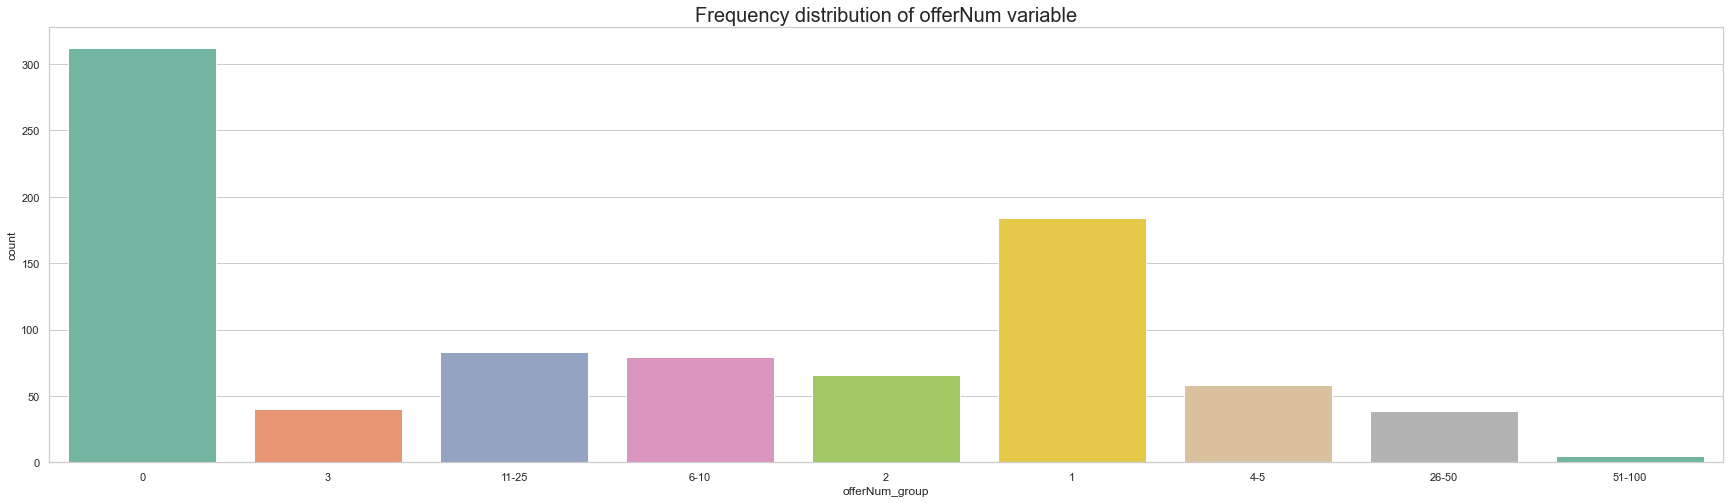

In [139]:
f, ax1 = plt.subplots(figsize=(30, 8))
ax1 = sns.countplot(x="offerNum_group", data=dfNew, palette="Set2")
ax1.set_title("Frequency distribution of offerNum variable",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Number of Offers Users Made by Users')

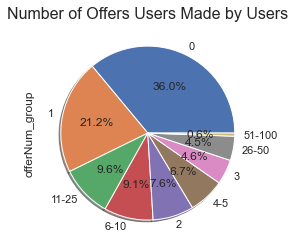

In [140]:
ax = dfNew["offerNum_group"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Number of Offers Users Made by Users",fontsize=16)

In [141]:
print(categorical + numerical)

['yearsInvesting', 'investmentHoldings', 'ogLastTXN', 'lastTXN', 'offerNames', 'signUpDate', 'ogSignUpDate', 'broker', 'firstOffer', 'clientSource', 'confidence', 'numOffers', 'TTV', 'age', 'avgSubscribedAmount']


<function matplotlib.pyplot.show(close=None, block=None)>

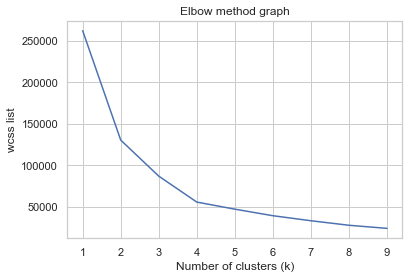

In [142]:
from sklearn.cluster import KMeans

#invConfidence and numOffers
dfNoCat = dfNew.drop(['yearsInvesting', 'investmentHoldings', 'ogLastTXN','lastTXN', 'offerNames', 'signUpDate', 'ogSignUpDate','broker', 'firstOffer', 'clientSource', 'confidence', 'TTV','Age_group','offerNum_group'],axis=1)

x = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters (k)")
plt.ylabel("wcss list")
plt.title("Elbow method graph")
plt.show

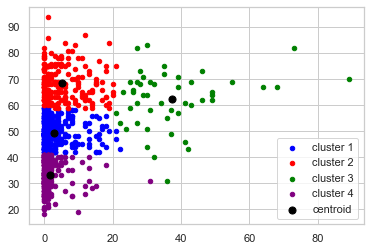

In [143]:
#age and num offers clustered 4 clusters
kmeans = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,random_state=0)
yPredict = kmeans.fit_predict(x)

plt.scatter(x[yPredict == 0, 0], x[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
plt.scatter(x[yPredict == 1, 0], x[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
plt.scatter(x[yPredict == 2, 0], x[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
plt.scatter(x[yPredict == 3, 0], x[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = "black", label = "centroid")
plt.legend()
plt.show()

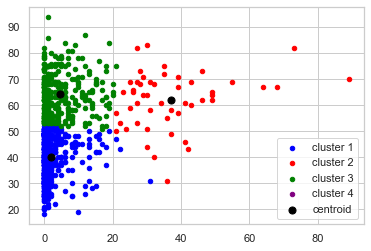

In [144]:
#age and num offers clustered 3 clusters
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
yPredict = kmeans.fit_predict(x)

plt.scatter(x[yPredict == 0, 0], x[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
plt.scatter(x[yPredict == 1, 0], x[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
plt.scatter(x[yPredict == 2, 0], x[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
plt.scatter(x[yPredict == 3, 0], x[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = "black", label = "centroid")
plt.legend()
plt.show()

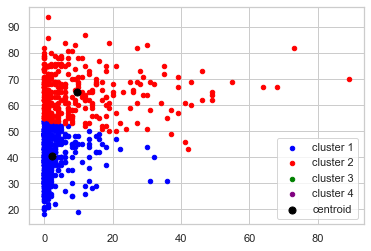

In [145]:
#age and num offers clustered 2 clusters
kmeans = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,random_state=0)
yPredict = kmeans.fit_predict(x)

plt.scatter(x[yPredict == 0, 0], x[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
plt.scatter(x[yPredict == 1, 0], x[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
plt.scatter(x[yPredict == 2, 0], x[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
plt.scatter(x[yPredict == 3, 0], x[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = "black", label = "centroid")
plt.legend()
plt.show()

In [146]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

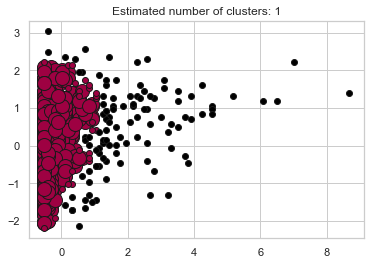

In [147]:
#DBSCAN (caluclated by distance between nearest points)
x = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE

X = StandardScaler().fit_transform(x)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [148]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

Estimated number of clusters: 183
Silhouette Coefficient: 0.296


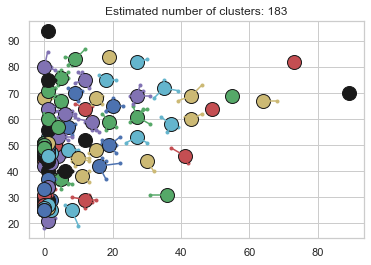

In [149]:
#affinity propagation clustering (generally used for many clusters of uneven size, graph distance)

X = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [150]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [151]:
#mean shift clustering algorithm
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7


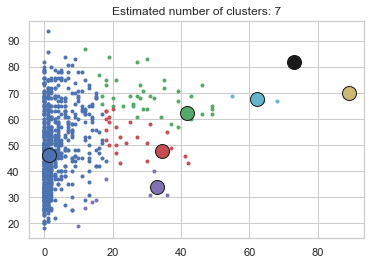

In [152]:

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

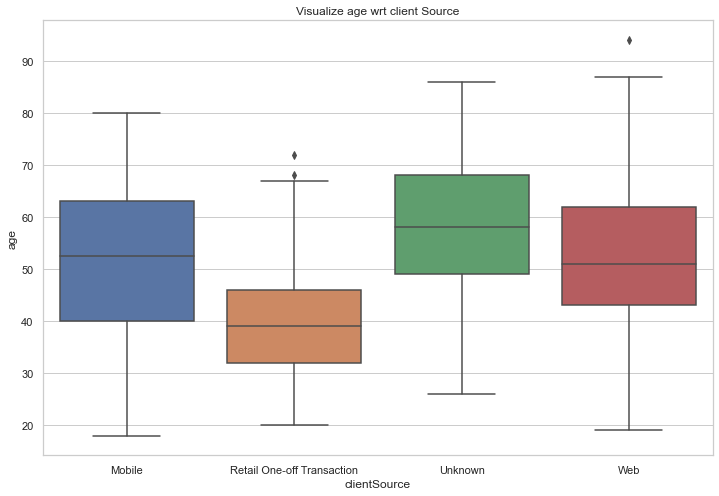

In [153]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='clientSource', y="age", data = dfNew)
plt.title("Visualize age wrt client Source")
plt.show()

In [154]:
def myfunc(x):
    return slope * x + intercept

def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

for depVar in numerical:
    dependent = depVar
    sample_outliers = detect_outliers_zscore(df[dependent])
    print("Outliers from",dependent, "Z-scores method: ", sample_outliers)

Outliers from confidence Z-scores method:  []
Outliers from numOffers Z-scores method:  [43.0, 64.0, 73.0, 46.0, 43.0, 42.0, 49.0, 89.0, 55.0, 49.0, 68.0, 49.0, 46.0]
Outliers from TTV Z-scores method:  [2127270.53, 424604.86, 612350.82, 931757.38, 377580.22]
Outliers from age Z-scores method:  []
Outliers from avgSubscribedAmount Z-scores method:  [332278.5, 2127270.53, 359399.08, 424604.86, 329715.58, 341981.19, 612350.82, 931757.38, 377580.22]


In [155]:
numericalClean = [var for var in dfNew.columns if dfNew[var].dtype!="O"]

for i in numericalClean:
    outliers = detect_outliers_zscore(dfNew[i])
#     print("Outliers from",i, "Z-scores method: ", outliers)
    count = 0
    mode = stats.mode(dfNew[i])
    replace = int(mode[0])
#     print("mode",replace)
    for k in dfNew[i]:
        if k in outliers:
            dfNew[i] = dfNew[i].replace(k,replace)
        count += 1

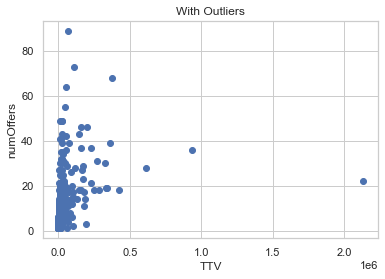

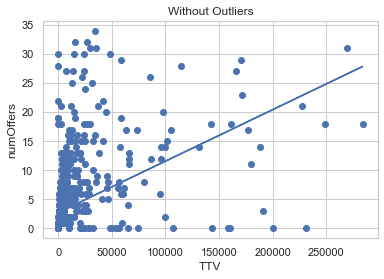

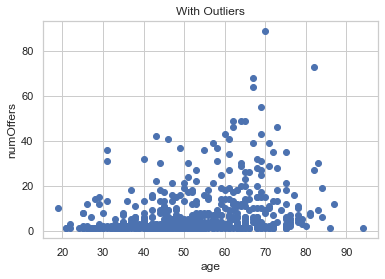

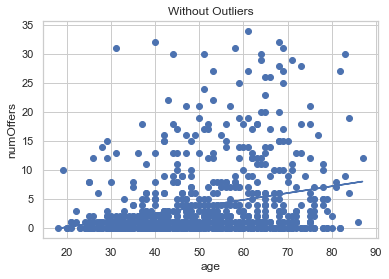

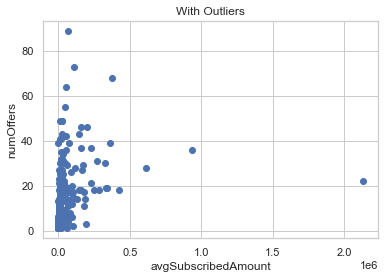

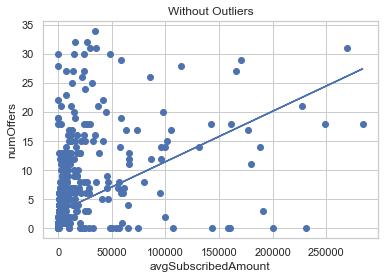

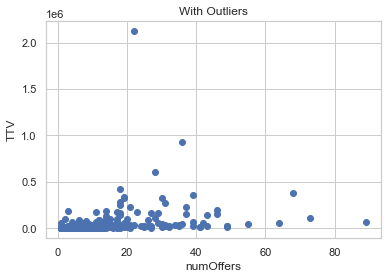

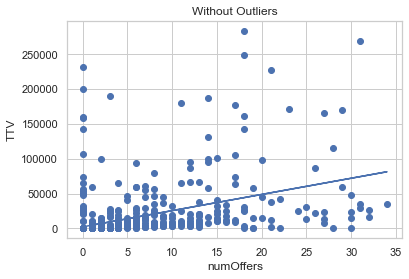

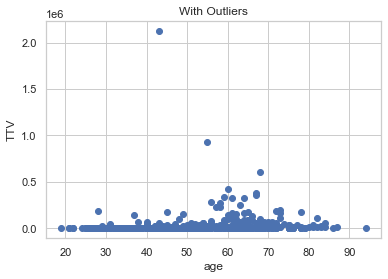

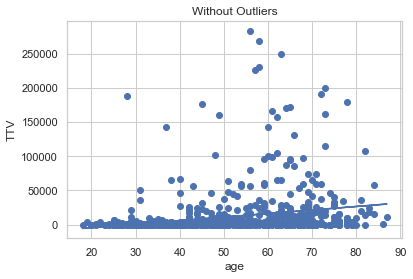

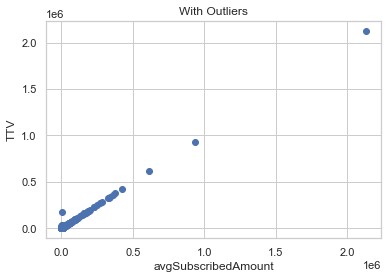

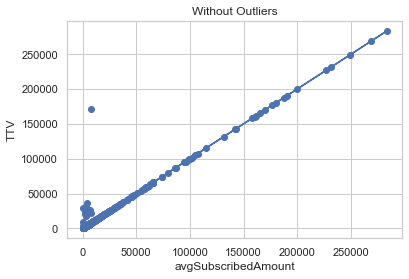

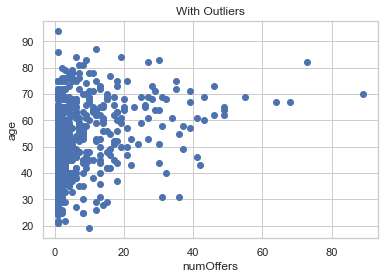

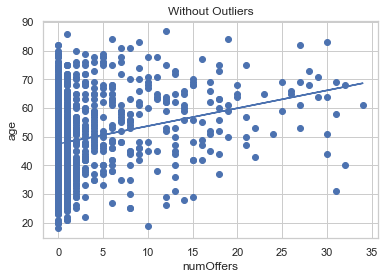

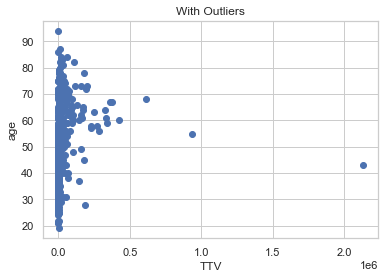

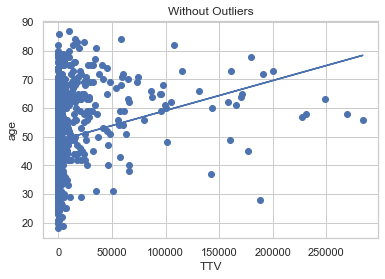

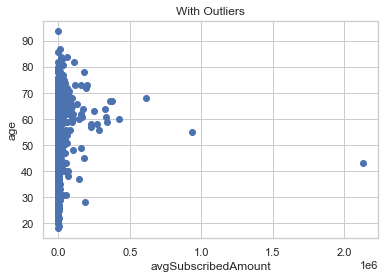

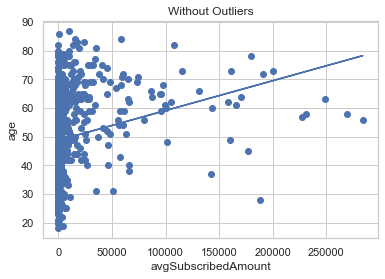

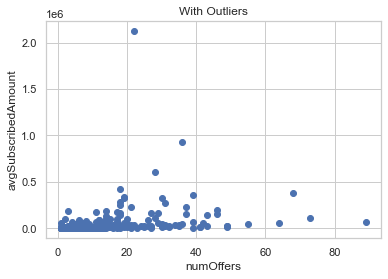

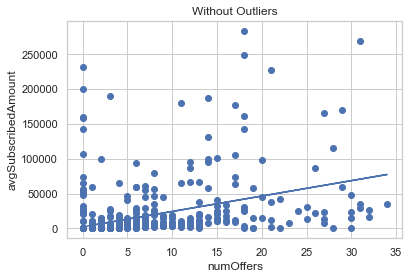

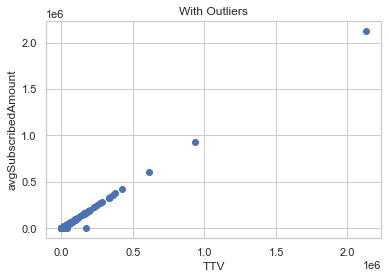

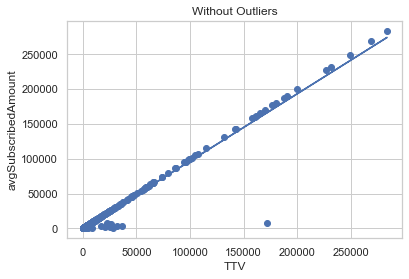

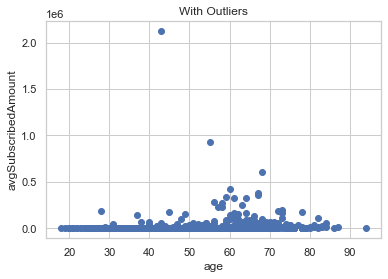

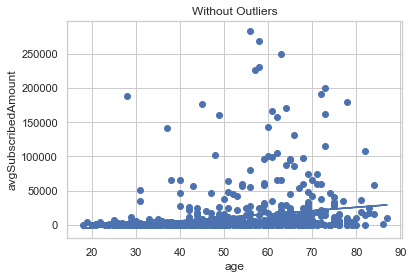

In [156]:
for depVar in numerical:
    dependent = depVar
    if depVar == "confidence":
        pass
    else:
        for indVar in numerical:
            independent = indVar
            if indVar == "confidence" or indVar == depVar:
                pass
            else:

                x = df[independent]
                y = df[dependent]

                slope, intercept, r, p, std_err = stats.linregress(x, y)


                mymodel = list(map(myfunc, x))

                plt.scatter(x, y)
                plt.plot(x, mymodel)
                plt.title("With Outliers")
                plt.xlabel(independent)
                plt.ylabel(dependent)
                plt.show()


                x = dfNew[independent]
                y = dfNew[dependent]

                slope, intercept, r, p, std_err = stats.linregress(x, y)


                mymodel = list(map(myfunc, x))

                plt.scatter(x, y)
                plt.plot(x, mymodel)
                plt.title("Without Outliers")
                plt.xlabel(independent)
                plt.ylabel(dependent)
                plt.show()

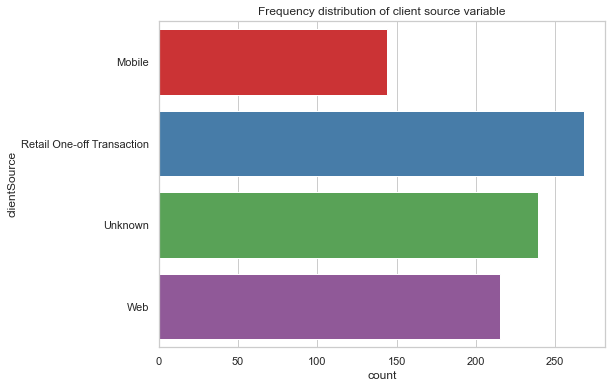

In [157]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="clientSource", data=dfNew, palette="Set1")
ax.set_title("Frequency distribution of client source variable")
plt.show()

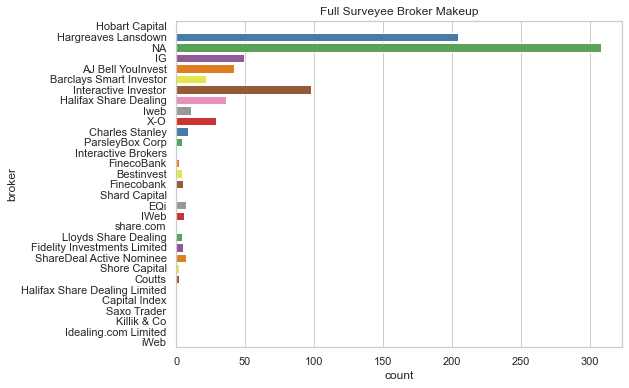

In [158]:
# visualize frequency distribution of `broker` variable

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="broker", data=dfNew, palette="Set1")
ax.set_title("Full Surveyee Broker Makeup")
plt.show()


# f, ax = plt.subplots(figsize=(16, 12))
# ax = sns.countplot(x="broker", data=df, palette="Set1")
# ax.set_title("Frequency distribution of broker variable",fontsize = 16)
# ax.set_xticklabels(df.broker.value_counts().index, rotation=90)
# plt.show()

#title, labels, ticker, legend, write numbers on top of bar

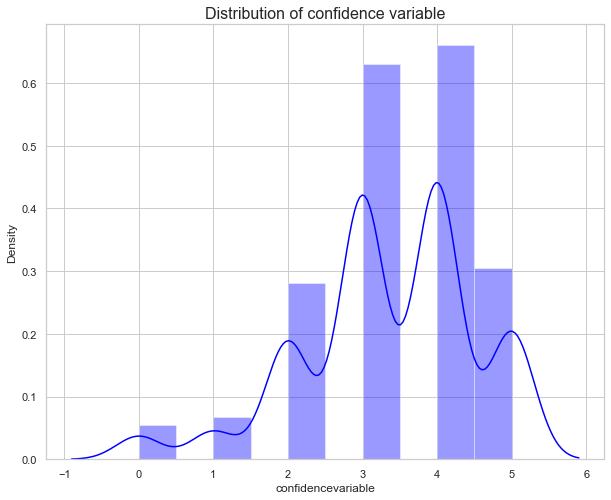

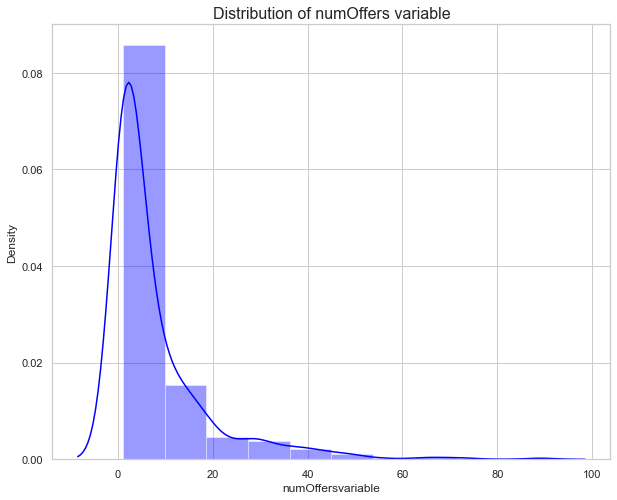

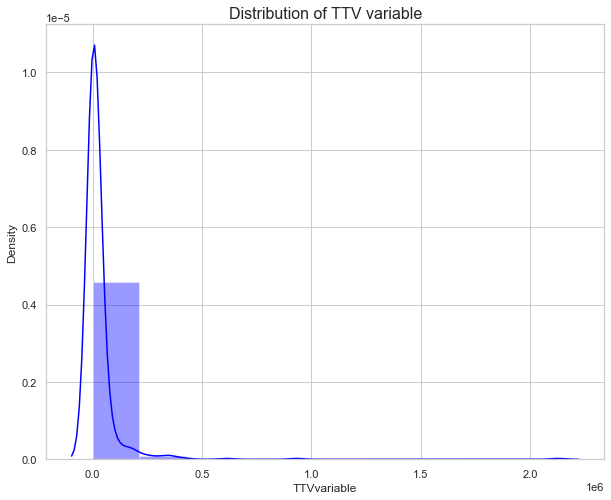

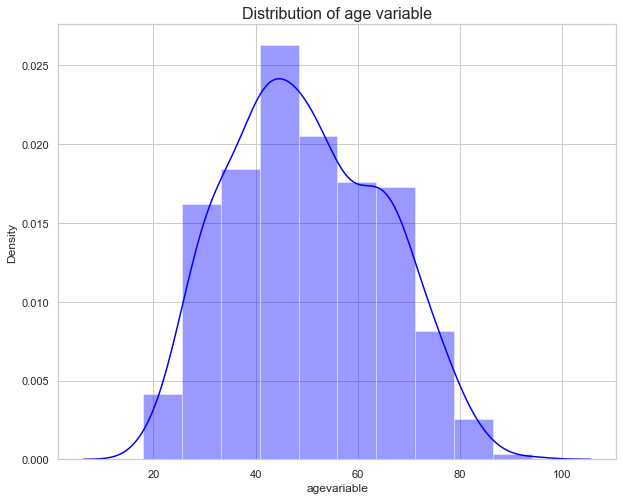

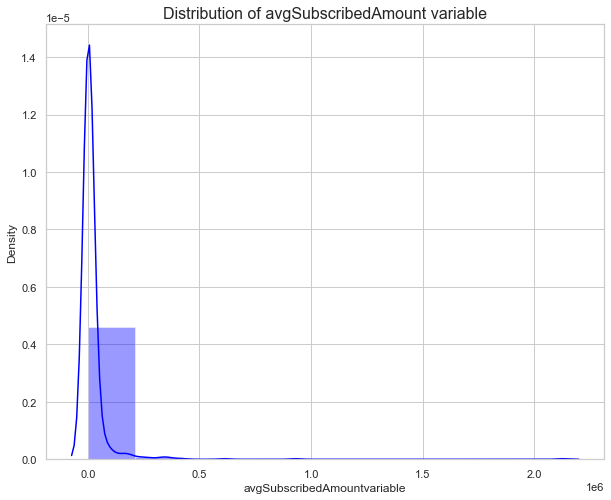

In [159]:
for var in numerical:
    f, ax = plt.subplots(figsize=(10,8))
    x = df[var]
    x = pd.Series(x,name=var + "variable")
    ax = sns.distplot(x, bins=10, color='blue')
    ax.set_title("Distribution of "+var+" variable",fontsize = 16)
    plt.show()

In [160]:
offerNamesList = []
count = 0
activeList = []
for k in dfNew["offerNames"]:
#     print(str(k))
    if "-" in str(k):
        activeList.append(count)
        offerNamesList.append(str(k))
    count += 1
# print(offerNamesList)


In [161]:
#looking at users who have made at least one deal only
count = 0
yearsInvestingList = []
investmentHoldingsList = []
lastTXNList = []
# offerNamesList = []
signUpDateList = []
brokerList = []
firstOfferList = []
clientSourceList = []
confidenceList = []
numOffersList = []
TTVList = []
ageList = []
avgSubscribedAmountList = []

for k in dfNew['yearsInvesting']:
    if count in activeList:
        yearsInvestingList.append(str(k))
    count += 1
count = 0
for k in dfNew['investmentHoldings']:
    if count in activeList:
        investmentHoldingsList.append(str(k))
    count += 1
count = 0
for k in dfNew['lastTXN']:
    if count in activeList:
        lastTXNList.append(str(k))
    count += 1
count = 0
for k in dfNew['signUpDate']:
    if count in activeList:
        signUpDateList.append(str(k))
    count += 1
count = 0
for k in dfNew['broker']:
    if count in activeList:
        brokerList.append(str(k))
    count += 1
count = 0
for k in dfNew['firstOffer']:
    if count in activeList:
        firstOfferList.append(str(k))
    count += 1
count = 0
for k in dfNew['clientSource']:
    if count in activeList:
        clientSourceList.append(str(k))
    count += 1
count = 0
for k in dfNew['confidence']:
    if count in activeList:
        confidenceList.append(float(k))
    count += 1
count = 0
for k in dfNew['numOffers']:
    if count in activeList:
        numOffersList.append(float(k))
    count += 1
count = 0
for k in dfNew['TTV']:
    if count in activeList:
        TTVList.append(float(k))
    count += 1
count = 0
for k in dfNew['age']:
    if count in activeList:
        ageList.append(float(k))
    count += 1
count = 0
for k in dfNew['avgSubscribedAmount']:
    if count in activeList:
        avgSubscribedAmountList.append(float(k))
    count += 1
count = 0       
#     count +=1

In [162]:
dfActive = pd.DataFrame()
dfActive["yearsInvesting"] = yearsInvestingList
dfActive["investmentHoldings"] = investmentHoldingsList
dfActive["lastTXN"] = lastTXNList
dfActive["offerNames"] = offerNamesList
dfActive["signUpDate"] = signUpDateList
dfActive["broker"] = brokerList
dfActive["firstOffer"] = firstOfferList
dfActive["clientSource"] = clientSourceList
dfActive["confidence"] = confidenceList
dfActive["numOffers"] = numOffersList
dfActive["TTV"] = TTVList
dfActive["age"] = ageList
dfActive["avgSubscribedAmount"] = avgSubscribedAmountList


In [163]:
# print(dfActive)
dfTest = df.copy()
dfTest['signUpDate']= pd.to_datetime(dfTest['signUpDate'])
# dfTest.info()
print(dfTest['signUpDate'].head(30))

0    2022-01-28
1    2021-02-27
2    2021-03-30
3    2016-03-15
4    2021-11-12
5    2021-02-25
6    2018-10-18
7    2021-02-18
8    2021-03-15
9    2021-02-18
10   2021-11-11
11   2020-06-27
12   2021-06-25
13   2022-04-29
14   2021-03-10
15   2021-04-17
16   2021-11-22
17   2021-04-23
18   2021-04-10
19   2021-02-17
20   2021-08-31
21          NaT
22          NaT
23   2021-03-09
24   2020-04-25
25   2021-03-19
26   2021-03-10
27   2021-03-15
28   2021-07-02
29   2020-05-22
Name: signUpDate, dtype: datetime64[ns]


In [164]:
count = 0
preWebList = []
postWebList = []
preSignUpDateList = []
postSignUpDateList = []


for k in dfTest["signUpDate"]:
#     print(str(k)[0:10])
    if "2021-03-08" > str(k):
#         print(str(k)+" in past")
        preWebList.append(count)
        preSignUpDateList.append(str(k)[0:10])
    elif "-" not in str(k):
        pass
    else:
#         print(str(k)+" in future")
        postWebList.append(count)
        postSignUpDateList.append(str(k)[0:10])
    count += 1
# print(postSignUpDateList)
# print(preSignUpDateList)


In [165]:
#looking at users who have made at least one deal only
count = 0
preYearsInvestingList = []
preInvestmentHoldingsList = []
preLastTXNList = []
preOfferNamesList = []
preBrokerList = []
preFirstOfferList = []
preClientSourceList = []
preConfidenceList = []
preNumOffersList = []
preTTVList = []
preAgeList = []
preAvgSubscribedAmountList = []

postYearsInvestingList = []
postInvestmentHoldingsList = []
postLastTXNList = []
postOfferNamesList = []
postBrokerList = []
postFirstOfferList = []
postClientSourceList = []
postConfidenceList = []
postNumOffersList = []
postTTVList = []
postAgeList = []
postAvgSubscribedAmountList = []

for k in dfNew['yearsInvesting']:
    if count in preWebList:
        preYearsInvestingList.append(str(k))
    elif count in postWebList:
        postYearsInvestingList.append(str(k))
    count += 1
count = 0
for k in dfNew['investmentHoldings']:
    if count in preWebList:
        preInvestmentHoldingsList.append(str(k))
    elif count in postWebList:
        postInvestmentHoldingsList.append(str(k))
    count += 1
count = 0
for k in dfNew['lastTXN']:
    if count in preWebList:
        preLastTXNList.append(str(k))
    elif count in postWebList:
        postLastTXNList.append(str(k))
    count += 1
count = 0
for k in dfNew['offerNames']:
    if count in preWebList:
        preOfferNamesList.append(str(k))
    elif count in postWebList:
        postOfferNamesList.append(str(k))
    count += 1
count = 0
for k in dfNew['broker']:
    if count in preWebList:
        preBrokerList.append(str(k))
    elif count in postWebList:
        postBrokerList.append(str(k))
    count += 1
count = 0
for k in dfNew['firstOffer']:
    if count in preWebList:
        preFirstOfferList.append(str(k))
    elif count in postWebList:
        postFirstOfferList.append(str(k))
    count += 1
count = 0
for k in dfNew['clientSource']:
    if count in preWebList:
        preClientSourceList.append(str(k))
    elif count in postWebList:
        postClientSourceList.append(str(k))
    count += 1
count = 0
for k in dfNew['confidence']:
    if count in preWebList:
        preConfidenceList.append(float(k))
    elif count in postWebList:
        postConfidenceList.append(float(k))
    count += 1
count = 0
for k in dfNew['numOffers']:
    if count in preWebList:
        preNumOffersList.append(float(k))
    elif count in postWebList:
        postNumOffersList.append(float(k))
    count += 1
count = 0
for k in dfNew['TTV']:
    if count in preWebList:
        preTTVList.append(float(k))
    elif count in postWebList:
        postTTVList.append(float(k))
    count += 1
count = 0
for k in dfNew['age']:
    if count in preWebList:
        preAgeList.append(float(k))
    elif count in postWebList:
        postAgeList.append(float(k))
    count += 1
count = 0
for k in dfNew['avgSubscribedAmount']:
    if count in preWebList:
        preAvgSubscribedAmountList.append(float(k))
    elif count in postWebList:
        postAvgSubscribedAmountList.append(float(k))
    count += 1
count = 0       
#     count +=1

In [166]:
dfPre = pd.DataFrame()

dfPre["yearsInvesting"] = preYearsInvestingList
dfPre["investmentHoldings"] = preInvestmentHoldingsList
dfPre["lastTXN"] = preLastTXNList
dfPre["offerNames"] = preOfferNamesList
dfPre["signUpDate"] = preSignUpDateList
dfPre["broker"] = preBrokerList
dfPre["firstOffer"] = preFirstOfferList
dfPre["clientSource"] = preClientSourceList
dfPre["confidence"] = preConfidenceList
dfPre["numOffers"] = preNumOffersList
dfPre["TTV"] = preTTVList
dfPre["age"] = preAgeList
dfPre["avgSubscribedAmount"] = preAvgSubscribedAmountList


dfPost = pd.DataFrame()
dfPost["yearsInvesting"] = postYearsInvestingList
dfPost["investmentHoldings"] = postInvestmentHoldingsList
dfPost["lastTXN"] = postLastTXNList
dfPost["offerNames"] = postOfferNamesList
dfPost["signUpDate"] = postSignUpDateList
dfPost["broker"] = postBrokerList
dfPost["firstOffer"] = postFirstOfferList
dfPost["clientSource"] = postClientSourceList
dfPost["confidence"] = postConfidenceList
dfPost["numOffers"] = postNumOffersList
dfPost["TTV"] = postTTVList
dfPost["age"] = postAgeList
dfPost["avgSubscribedAmount"] = postAvgSubscribedAmountList


In [167]:
dfPre.head()

yearsInvesting     investmentHoldings     lastTXN  \
0                    3 to 5 years     ¬£50,000-¬£249,999  2022-03-02   
1                10 or more years      Prefer not to say  2021-11-18   
2  I work in the financial sector          Under ¬£5,000  2021-12-13   
3                10 or more years     ¬£50,000-¬£249,999          NA   
4                10 or more years  ¬£500,000-¬£2,499,999  2022-05-10   

                                          offerNames  signUpDate  \
0    2022-03-02-EOG, 2021-12-13-ZNWD, 2021-03-21-ROO  2021-02-27   
1  2021-11-18-LMP, 2021-11-11-AGR, 2021-11-08-SRE...  2016-03-15   
2                    2021-12-13-ZNWD, 2021-03-21-ROO  2021-02-25   
3                                                 NA  2018-10-18   
4  2022-05-10-DUKE, 2022-03-02-EOG, 2021-12-01-HF...  2021-02-18   

                    broker      firstOffer clientSource  confidence  \
0      Hargreaves Lansdown             N/A       Mobile         3.0   
1                       IG             N/A      Unknown         5.0   
2  Barclays Smart Investor             N/A          Web         4.0   
3                       NA             N/A      Unknown         3.0   
4        AJ Bell YouInvest  2021-02-15-CBX          Web         5.0   

   numOffers       TTV   age  avgSubscribedAmount  
0        3.0   2498.26  43.0              2498.26  
1       19.0      0.00  61.0                 0.00  
2        2.0    749.06  45.0               749.06  
3        0.0      0.00  69.0                 0.00  
4       14.0  99216.68  61.0             99216.68

In [168]:
activePre = 0
for k in dfPre["offerNames"]:
    if "," in str(k):
#         print(str(k))
        activePre +=1
        
    count +=1
print(activePre)
#204 users have made 2 or more deals before March 2021

213


In [169]:
activePost = 0
for k in dfPost["offerNames"]:
    if "," in str(k):
#         print(str(k))
        activePost +=1
        
    count +=1
print(activePost) 
# 165 users have made 2 or more deals after March 2021

156


In [170]:
inactivePre = 0
for k in dfPre["offerNames"]:
    if "," not in str(k) and "-" not in str(k):
#         print(str(k))
        inactivePre +=1
        
    count +=1
print(inactivePre)
#only 52 users were inactive before March 2021

56


In [171]:
inactivePost = 0
for k in dfPost["offerNames"]:
    if "," not in str(k) and "-" not in str(k):
#         print(str(k))
        inactivePost +=1
        
    count +=1
print(inactivePost)
#222 users who signed up after March 2021 are inactive

218


In [172]:
oneDealPre = 0
for k in dfPre["offerNames"]:
    if "," not in str(k) and "-" in str(k):
#         print(str(k))
        oneDealPre +=1
        
    count +=1
print(oneDealPre)
#42 users have only made one deal since March 2021

44


In [173]:
oneDealPost = 0
for k in dfPost["offerNames"]:
    if "," not in str(k) and "-" in str(k):
#         print(str(k))
        oneDealPost +=1
        
    count +=1
print(oneDealPost)
#142 users have made only one deal after March 2021

141


In [174]:
dfTest.isnull().sum()

yearsInvesting           0
investmentHoldings       0
confidence               0
numOffers              312
TTV                    312
ogLastTXN              312
lastTXN                312
offerNames             312
age                     45
signUpDate              38
ogSignUpDate            38
broker                 308
avgSubscribedAmount     38
firstOffer             455
clientSource            38
dtype: int64

In [175]:
#idea of new category of active vs inactive

#     inactive criteria
#     -made no deals
#     -made one deals since before web shut down
    
totalPreUsers = activePre + inactivePre + oneDealPre
totalPostUsers = activePost + inactivePost + oneDealPost

print("Users pre March 2021: "+str(totalPreUsers))
print("Users post March 2021: "+str(totalPostUsers))
print(totalPreUsers+totalPostUsers +38) #38 missing dates



Users pre March 2021: 313
Users post March 2021: 515
866


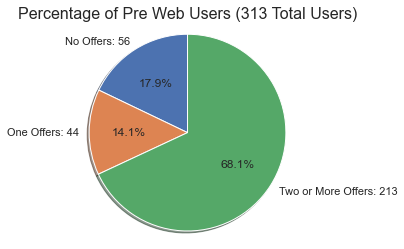

In [176]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Offers: '+str(inactivePre), 'One Offers: '+str(oneDealPre), "Two or More Offers: "+str(activePre)
sizes = [inactivePre,oneDealPre,activePre]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Pre Web Users (" +str(totalPreUsers)+" Total Users)",fontsize=16)


plt.show()

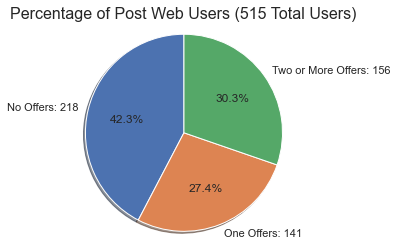

In [177]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Offers: '+str(inactivePost), 'One Offers: '+str(oneDealPost), "Two or More Offers: "+str(activePost)
sizes = [inactivePost,oneDealPost,activePost]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Post Web Users (" +str(totalPostUsers)+" Total Users)",fontsize=16)


plt.show()

In [178]:
active = 0
for k in dfActive["offerNames"]:
    if "," in str(k):
#         print(str(k))
        active +=1
        
    count +=1
print(active)

369


In [179]:
inactive = 0
for k in dfActive["offerNames"]:
    if "," not in str(k) and "-" not in str(k):
#         print(str(k))
        inactive +=1
        
    count +=1
print(inactive)

0


In [180]:
oneDeal = 0
for k in dfActive["offerNames"]:
    if "," not in str(k) and "-" in str(k):
#         print(str(k))
        oneDeal +=1
        
    count +=1
print(oneDeal)

185


In [181]:
total = 0
for k in dfActive["offerNames"]:
#     if "," not in str(k):
#         print(str(k))
#         inactive +=1
        
    total +=1
print(total)

554


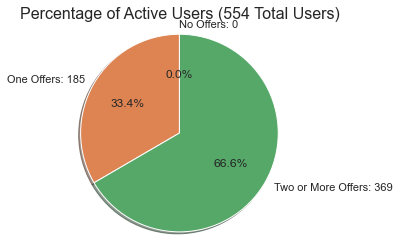

In [182]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Offers: '+str(inactive), 'One Offers: '+str(oneDeal), "Two or More Offers: "+str(active)
sizes = [inactive,oneDeal,active]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Active Users (" +str(total)+" Total Users)",fontsize=16)


plt.show()

In [183]:
#266 
commOffers = 0
meal = 0
roo = 0
art = 0
mcg = 0
pbee = 0
for k in df["offerNames"]:
    if "MCG" in str(k):
        mcg +=1
        commOffers +=1
    elif "ART" in str(k):
        commOffers +=1
        art +=1
    elif "PBEE" in str(k):
        commOffers +=1
        pbee +=1
    elif "MEAL" in str(k):
        meal += 1
        commOffers +=1
    elif "ROO" in str(k):
        roo +=1
        commOffers +=1
    else:
        pass
print("Total: "+str(commOffers))
print("MEAL: "+str(meal))
print("ROO: "+str(roo))
print("ART: "+str(art))
print("MCG: "+str(mcg))
print("PBEE: "+str(pbee))

Total: 266
MEAL: 29
ROO: 179
ART: 28
MCG: 3
PBEE: 27


In [184]:
# changing the precision of the 'Age' column
# df['age']= df['age'].astype(str).apply(lambda x: x.replace('.0', ''))
# create a column for the age group.
dfActive['Age_group'] = ''
# group 1 is 18-30 people
dfActive['Age_group'] = np.where(
(dfActive['age'] <= 30) & (dfActive['age'] >= 18) , '18-30', dfActive['Age_group'])
# group 2 is 30-40 years people
dfActive['Age_group'] = np.where(
(dfActive['age'] <= 40) & (dfActive['age'] > 30) , '30-40', dfActive['Age_group'])
# group 3 is 40-50 years old
dfActive['Age_group'] =  np.where(
(dfActive['age'] <=50) & (dfActive['age'] > 40) , '40-50', dfActive['Age_group'])
# group 4 is 50-60 years old
dfActive['Age_group'] = np.where(
(dfActive['age'] <= 60) & (dfActive['age'] > 50), '50-60' , dfActive['Age_group'])
# group 5 is 60-70 years old
dfActive['Age_group'] = np.where(
(dfActive['age'] <=70)& (dfActive['age'] > 60),'60-70',dfActive['Age_group'])
# group 6 is 70-90 years old
dfActive['Age_group'] = np.where(
(dfActive['age'] <=100)& (dfActive['age'] > 70) , '70-100', dfActive['Age_group'])


In [185]:
# changing the precision of the 'Age' column
# df['age']= df['age'].astype(str).apply(lambda x: x.replace('.0', ''))
# create a column for the age group.
dfNew['avgSubGroup'] = ''
# group 1 is 18-30 people
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 0) & (dfNew['avgSubscribedAmount'] > -1) , '0', dfNew['avgSubGroup'])
#group
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 1000) & (dfNew['avgSubscribedAmount'] >= 1) , '1-1000', dfNew['avgSubGroup'])
# group 2 is 30-40 years people
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 5000) & (dfNew['avgSubscribedAmount'] > 1000) , '1000-5000', dfNew['avgSubGroup'])
# group 3 is 40-50 years old
dfNew['avgSubGroup'] =  np.where(
(dfNew['avgSubscribedAmount'] <=10000) & (dfNew['avgSubscribedAmount'] > 5000) , '5000-10000', dfNew['avgSubGroup'])
# group 4 is 50-60 years old
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 20000) & (dfNew['avgSubscribedAmount'] > 10000), '10000-20000' , dfNew['avgSubGroup'])
# group 5 is 60-70 years old
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <=50000)& (dfNew['avgSubscribedAmount'] > 20000),'20000-50000',dfNew['avgSubGroup'])
# group 6 is 70-90 years old
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <=100000)& (dfNew['avgSubscribedAmount'] > 50000) , '50000-100000', dfNew['avgSubGroup'])
# group 6 is 70-90 years old
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <=3000000)& (dfNew['avgSubscribedAmount'] > 100000) , '100000-3000000', dfNew['avgSubGroup'])



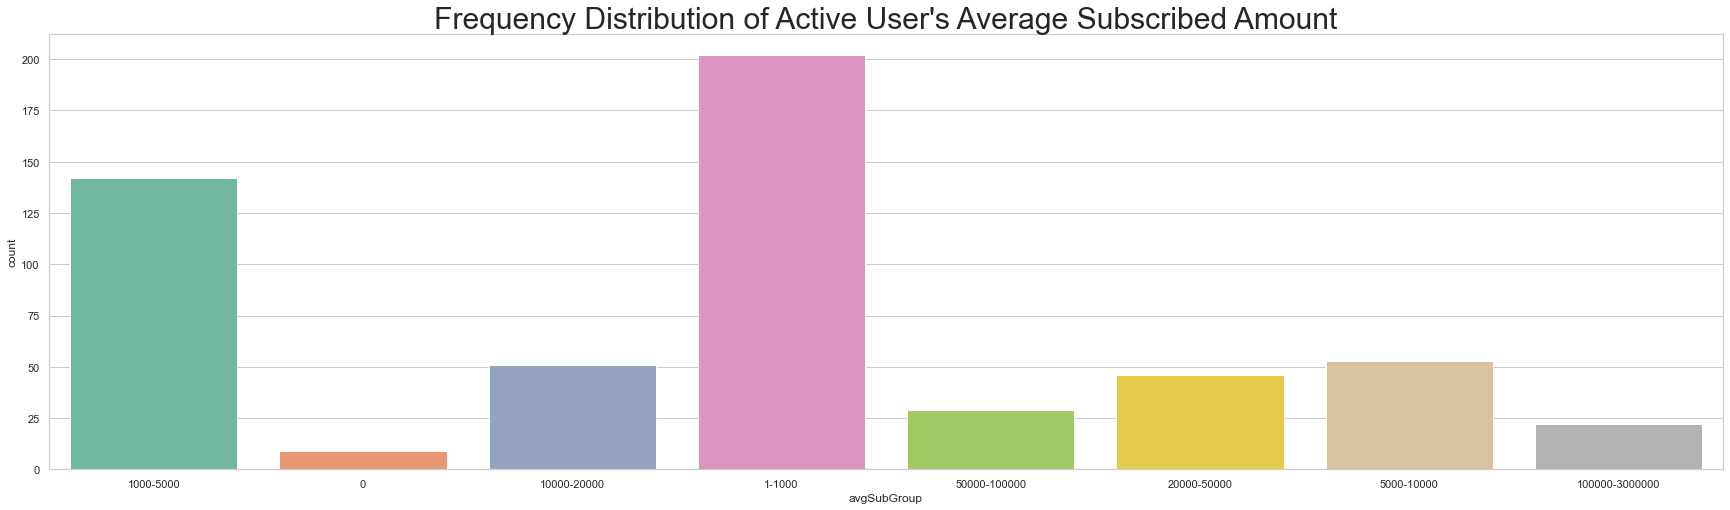

In [186]:
f, ax = plt.subplots(figsize=(30, 8))
ax = sns.countplot(x="avgSubGroup", data=dfActive, palette="Set2")
ax.set_title("Frequency Distribution of Active User's Average Subscribed Amount",fontsize=30)
plt.show()

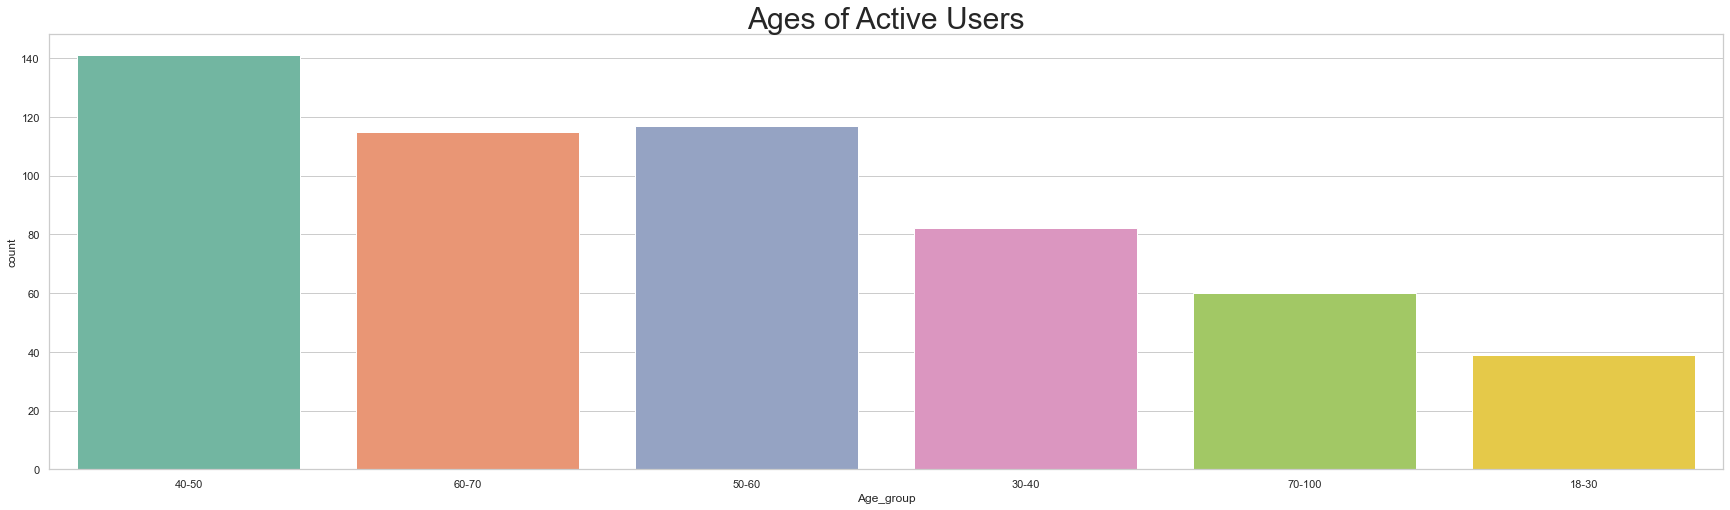

In [187]:
f, ax = plt.subplots(figsize=(30, 8))
ax = sns.countplot(x="Age_group", data=dfActive, palette="Set2")
ax.set_title("Ages of Active Users",fontsize=30)
plt.show()

In [188]:
catActive = [var for var in dfActive.columns if dfActive[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(catActive)))

print('The categorical variables are :\n\n', catActive)

There are 10 categorical variables

The categorical variables are :

 ['yearsInvesting', 'investmentHoldings', 'lastTXN', 'offerNames', 'signUpDate', 'broker', 'firstOffer', 'clientSource', 'Age_group', 'avgSubGroup']


In [189]:
numActive = [var for var in dfActive.columns if dfActive[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numActive)))

print('The numerical variables are :\n\n', numActive)

There are 5 numerical variables

The numerical variables are :

 ['confidence', 'numOffers', 'TTV', 'age', 'avgSubscribedAmount']


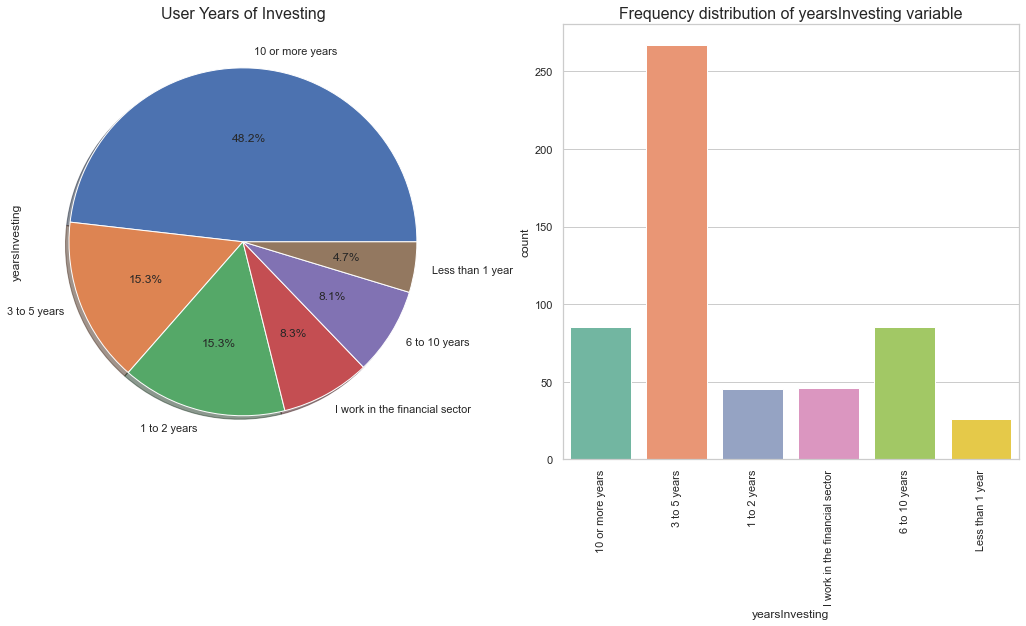

In [190]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = dfActive["yearsInvesting"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("User Years of Investing",fontsize=16)


# f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="yearsInvesting", data=dfActive, palette="Set2")
ax[1].set_title("Frequency distribution of yearsInvesting variable",fontsize=16)
ax[1].set_xticklabels(dfActive.yearsInvesting.value_counts().index, rotation=90)
plt.show()

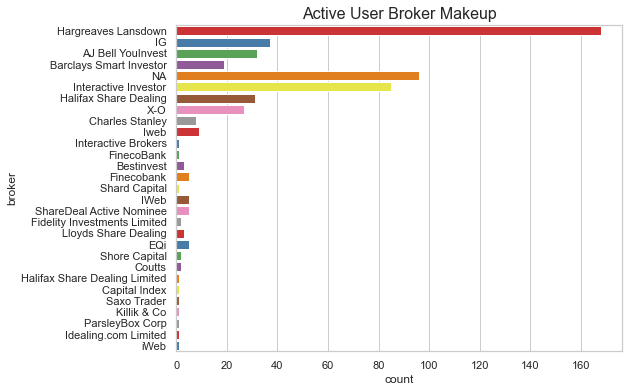

In [191]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="broker", data=dfActive, palette="Set1")
ax.set_title("Active User Broker Makeup",fontsize = 16)
plt.show()


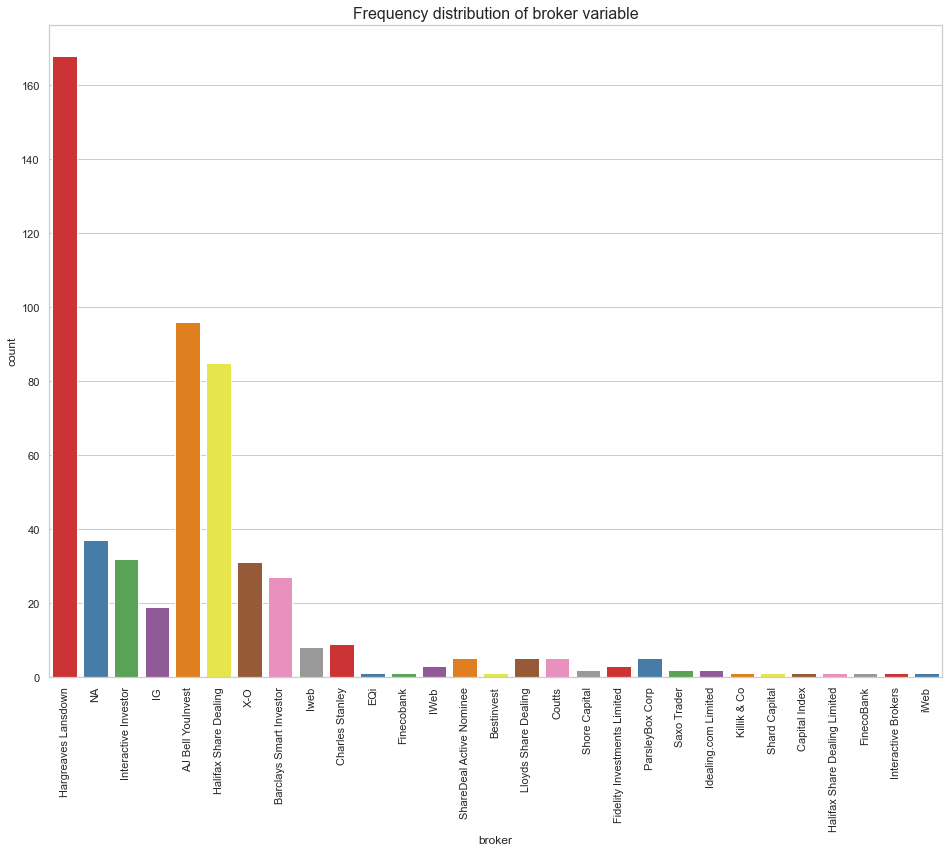

In [192]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="broker", data=dfActive, palette="Set1")
ax.set_title("Frequency distribution of broker variable",fontsize = 16)
ax.set_xticklabels(dfActive.broker.value_counts().index, rotation=90)
plt.show()

In [193]:
print(catActive + numActive)

['yearsInvesting', 'investmentHoldings', 'lastTXN', 'offerNames', 'signUpDate', 'broker', 'firstOffer', 'clientSource', 'Age_group', 'avgSubGroup', 'confidence', 'numOffers', 'TTV', 'age', 'avgSubscribedAmount']


     numOffers   age   avgSubGroup
0          3.0  43.0     1000-5000
1         19.0  61.0             0
2          7.0  58.0   10000-20000
3          2.0  45.0        1-1000
4         14.0  61.0  50000-100000
..         ...   ...           ...
549        1.0  32.0        1-1000
550        9.0  58.0     1000-5000
551       10.0  45.0     1000-5000
552        6.0  40.0        1-1000
553        1.0  43.0        1-1000

[554 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

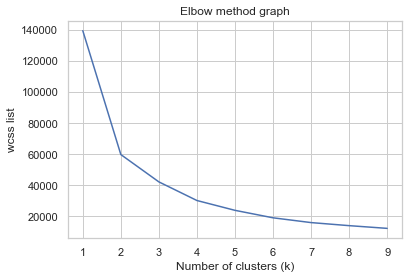

In [194]:
from sklearn.cluster import KMeans

#invConfidence and numOffers
dfNoCat = dfActive.drop(['yearsInvesting', 'investmentHoldings', 'lastTXN', 'offerNames', 'signUpDate', 'broker', 'firstOffer', 'clientSource', 'Age_group', 'confidence', 'TTV','avgSubscribedAmount'],axis=1)

print(dfNoCat)

x = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters (k)")
plt.ylabel("wcss list")
plt.title("Elbow method graph")
plt.show

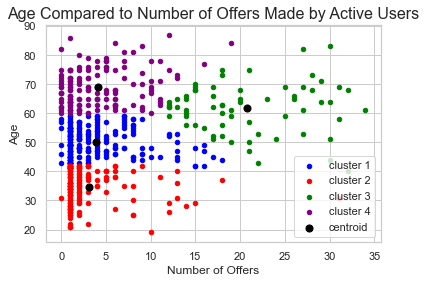

In [195]:
#age and num offers clustered 4 clusters
kmeans = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,random_state=0)
yPredict = kmeans.fit_predict(x)

plt.scatter(x[yPredict == 0, 0], x[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
plt.scatter(x[yPredict == 1, 0], x[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
plt.scatter(x[yPredict == 2, 0], x[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
plt.scatter(x[yPredict == 3, 0], x[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = "black", label = "centroid")
plt.legend()
plt.xlabel("Number of Offers")
plt.ylabel("Age")
plt.title("Age Compared to Number of Offers Made by Active Users",fontsize=16)

plt.show()

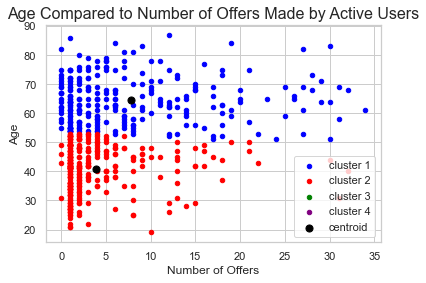

In [196]:
#age and num offers clustered 2 clusters
kmeans = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,random_state=0)
yPredict = kmeans.fit_predict(x)

plt.scatter(x[yPredict == 0, 0], x[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
plt.scatter(x[yPredict == 1, 0], x[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
plt.scatter(x[yPredict == 2, 0], x[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
plt.scatter(x[yPredict == 3, 0], x[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = "black", label = "centroid")
plt.legend()
plt.xlabel("Number of Offers")
plt.ylabel("Age")
plt.title("Age Compared to Number of Offers Made by Active Users",fontsize=16)

plt.show()

In [197]:

#DBSCAN (caluclated by distance between nearest points)
x = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE
X = StandardScaler().fit_transform(x)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [198]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels)
# )
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 105
Silhouette Coefficient: 0.217


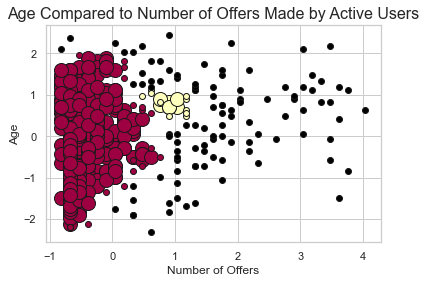

In [199]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel("Number of Offers")
plt.ylabel("Age")
plt.title("Age Compared to Number of Offers Made by Active Users",fontsize=16)


plt.show()

In [200]:
#affinity propagation clustering (generally used for many clusters of uneven size, graph distance)

X = dfNoCat.iloc[:,:-1].values #INDEPENDENT VARIABLE
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 75
Silhouette Coefficient: 0.389


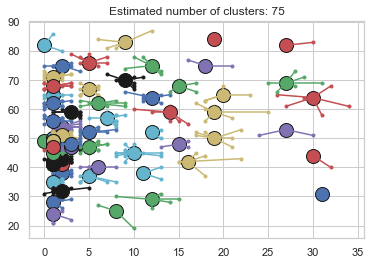

In [201]:
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [202]:
#mean shift clustering algorithm
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


Text(0.5, 1.0, 'Age Compared to Number of Offers Made by Active Users')

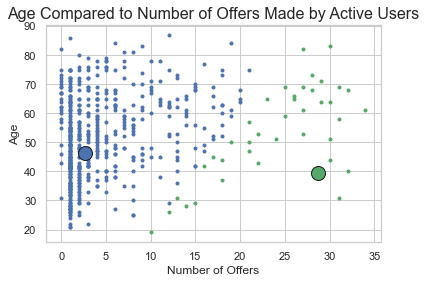

In [203]:

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.xlabel("Number of Offers")
plt.ylabel("Age")
plt.title("Age Compared to Number of Offers Made by Active Users",fontsize=16)


In [204]:
# plot correlation heatmap to find out correlations spearman method

dfActive.corr(method="spearman").style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

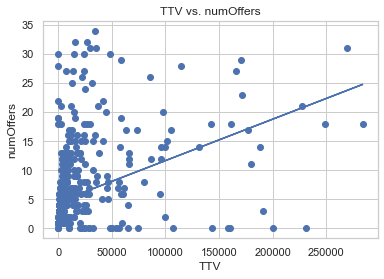

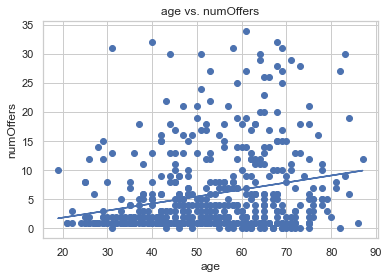

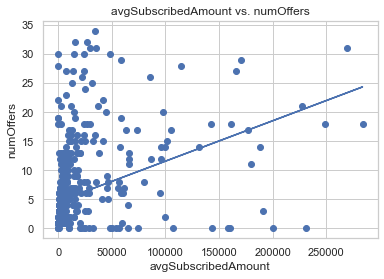

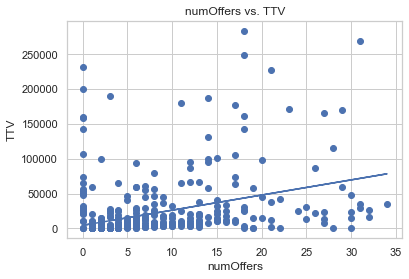

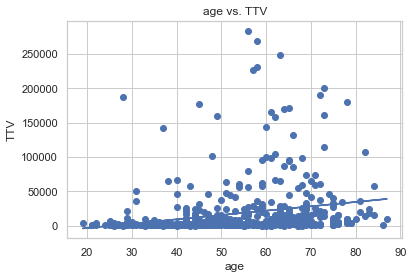

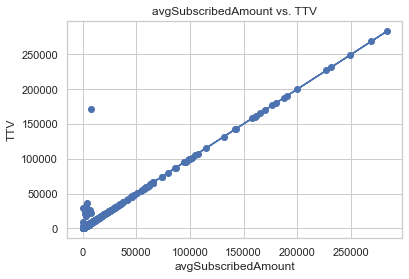

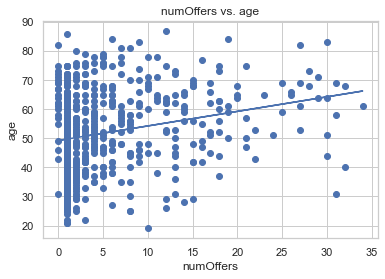

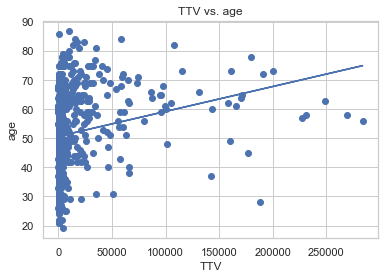

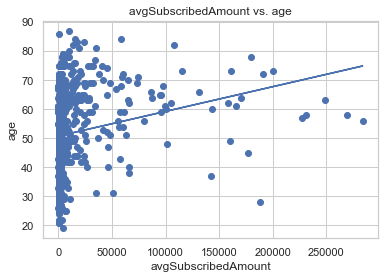

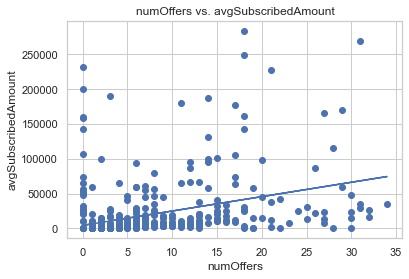

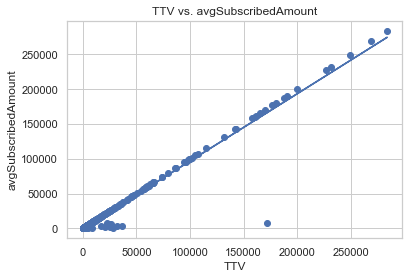

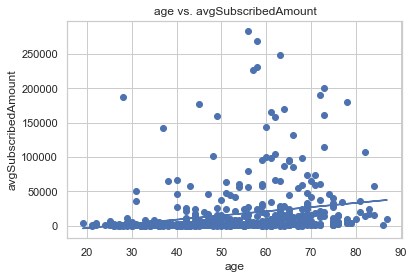

In [205]:
for depVar in numActive:
    dependent = depVar
    if depVar == "confidence":
        pass
    else:
        for indVar in numActive:
            independent = indVar
            if indVar == "confidence" or indVar == depVar:
                pass
            else:

#                 x = df[independent]
#                 y = df[dependent]

#                 slope, intercept, r, p, std_err = stats.linregress(x, y)


#                 mymodel = list(map(myfunc, x))

#                 plt.scatter(x, y)
#                 plt.plot(x, mymodel)
#                 plt.title("With Outliers")
#                 plt.xlabel(independent)
#                 plt.ylabel(dependent)
#                 plt.show()


                x = dfActive[independent]
                y = dfActive[dependent]

                slope, intercept, r, p, std_err = stats.linregress(x, y)


                mymodel = list(map(myfunc, x))

                plt.scatter(x, y)
                plt.plot(x, mymodel)
                plt.title(str(independent) + " vs. " + str(dependent))
                plt.xlabel(independent)
                plt.ylabel(dependent)
                plt.show()

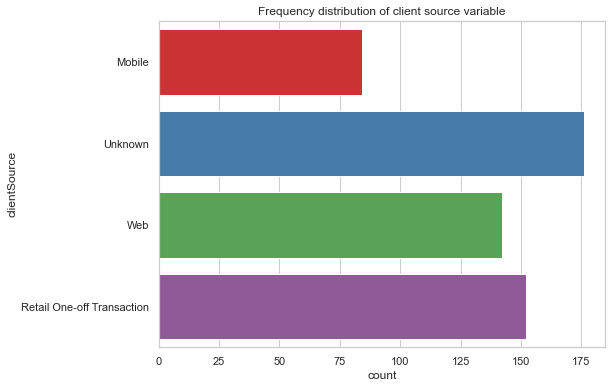

In [206]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="clientSource", data=dfActive, palette="Set1")
ax.set_title("Frequency distribution of client source variable")
plt.show()

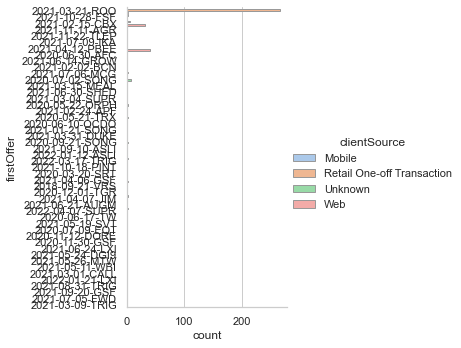

In [207]:

sns.catplot(y="firstOffer", hue="clientSource", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

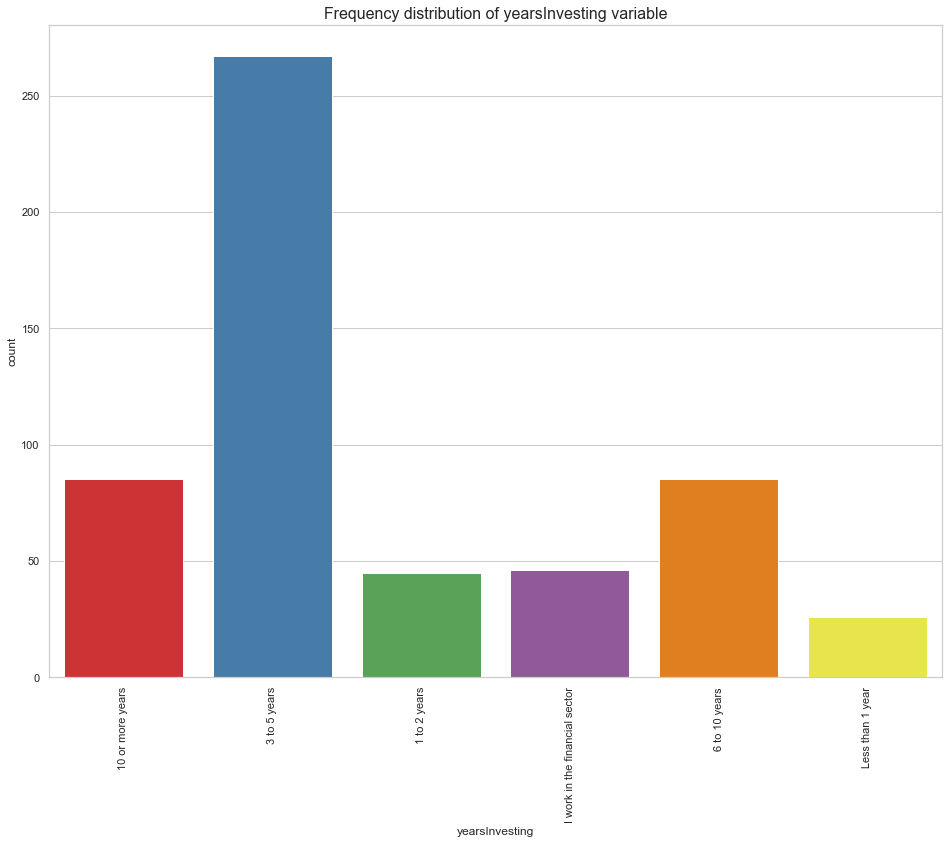

In [208]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="yearsInvesting", data=dfActive, palette="Set1")
ax.set_title("Frequency distribution of yearsInvesting variable",fontsize = 16)
ax.set_xticklabels(dfActive.yearsInvesting.value_counts().index, rotation=90)
plt.show()

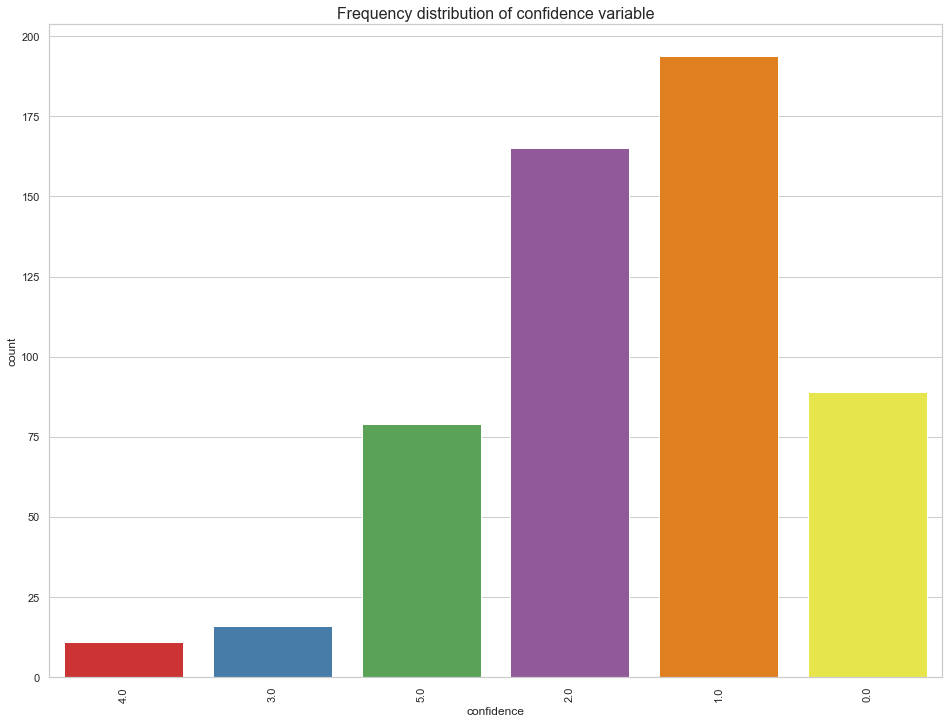

In [209]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="confidence", data=dfActive, palette="Set1")
ax.set_title("Frequency distribution of confidence variable",fontsize = 16)
ax.set_xticklabels(dfActive.confidence.value_counts().index, rotation=90)
plt.show()

In [210]:
pivotTable = pd.pivot_table(dfActive,'avgSubscribedAmount',index = ['confidence'],columns=['clientSource'], aggfunc = 'mean',)

In [211]:
pivotTable

clientSource        Mobile  Retail One-off Transaction       Unknown  \
confidence                                                             
0.0                    NaN                  648.996000           NaN   
1.0                    NaN                  867.521818   1699.080000   
2.0            2578.659091                 1653.466000   9318.432727   
3.0           10376.781071                 1453.588367  27226.260000   
4.0           11206.070667                 3352.870333  34864.064250   
5.0           20881.184667                 1550.771667  37225.568980   

clientSource           Web  
confidence                  
0.0             249.900000  
1.0             931.412500  
2.0            2321.195294  
3.0           12311.805472  
4.0           18319.580000  
5.0           29553.543077

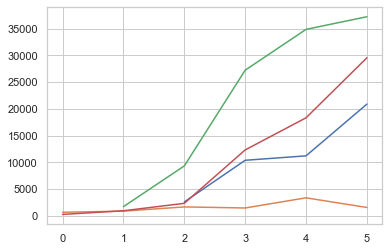

In [212]:
plt.plot(pivotTable)

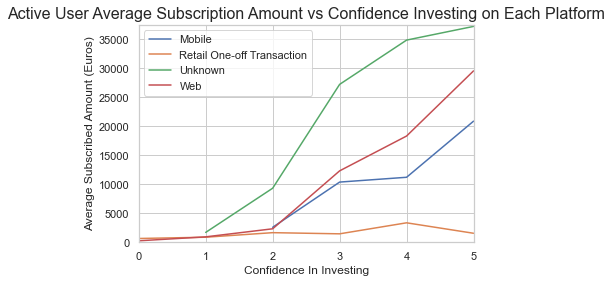

In [213]:
plt.plot(pivotTable,label=["Mobile","Retail One-off Transaction","Unknown","Web"])
plt.xlim(0,5)
plt.ylim(0,37500)
plt.xlabel('Confidence In Investing')
plt.ylabel('Average Subscribed Amount (Euros)')
plt.title('Active User Average Subscription Amount vs Confidence Investing on Each Platform',fontsize = 16)
plt.legend()

Text(0.5, 1.0, 'Active User Confidence In Investing')

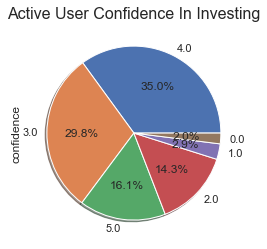

In [214]:
ax = dfActive["confidence"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Active User Confidence In Investing",fontsize=16)


Text(0.5, 1.0, 'Total User Confidence In Investing')

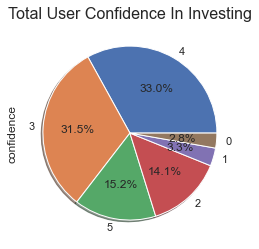

In [215]:
ax = df["confidence"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Total User Confidence In Investing",fontsize=16)

In [216]:
from kmodes.kmodes import KModes

In [217]:
# data = np.random.choice(20, (100, 10))
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(dfNew)
print(km.cluster_centroids_)



# yPredict = km.fit_predict(dfNew)

# # plt.scatter(dfNew[yPredict == 0, 0], dfNew[yPredict == 0, 1], s = 20, c = "blue",label = "cluster 1")
# plt.scatter(dfNew[yPredict == 1, 0], dfNew[yPredict == 1, 1], s = 20, c = "red",label = "cluster 2")
# plt.scatter(dfNew[yPredict == 2, 0], dfNew[yPredict == 2, 1], s = 20, c = "green",label = "cluster 3")
# plt.scatter(dfNew[yPredict == 3, 0], dfNew[yPredict == 3, 1], s = 20, c = "purple",label = "cluster 4")
# plt.scatter(km.cluster_centroids_[:,0], km.cluster_centroids_[:,1], s= 50, c = "black", label = "centroid")
# plt.legend()
# plt.xlabel("Number of Offers")
# plt.ylabel("Age")
# plt.title("Age Compared to Number of Offers Made by Active Users",fontsize=16)

# plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 239, cost: 8800.0
Run 1, iteration: 2/100, moves: 71, cost: 8762.0
Run 1, iteration: 3/100, moves: 39, cost: 8762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 232, cost: 8617.0
Run 2, iteration: 2/100, moves: 63, cost: 8579.0
Run 2, iteration: 3/100, moves: 23, cost: 8579.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 248, cost: 8645.0
Run 3, iteration: 2/100, moves: 101, cost: 8609.0
Run 3, iteration: 3/100, moves: 12, cost: 8609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 269, cost: 8651.0
Run 4, iteration: 2/100, moves: 83, cost: 8603.0
Run 4, iteration: 3/100, moves: 28, cost: 8603.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, 

In [218]:
from sklearn import preprocessing

In [274]:
#create dataset
import numpy as np 
import pandas as pd

operating_systems = ["Android","iOS"]
isp_names = ["Cox","HughesNet","Xfinity","AT&T"]

data = []
for i in range(100):
    row = []
    row.append(np.random.choice(isp_names))
    row.append(np.random.choice(operating_systems))
    row.append(np.random.poisson(lam=25))
    row.append(np.random.uniform(low=0.5, high=1000))
    data.append(row)

customers = pd.DataFrame(data, columns = ['ISP', 'OS','Age','Time Spent']) 


In [279]:
# customers.head()
customers.head()
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ISP         100 non-null    object 
 1   OS          100 non-null    object 
 2   Age         100 non-null    int64  
 3   Time Spent  100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [277]:
from sklearn import preprocessing

customers_norm = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['Age','Time Spent']] = scaler.fit_transform(customers_norm[['Age','Time Spent']])


In [278]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=3, init='Cao')

clusters = kproto.fit_predict(customers_norm, categorical=[0, 1])
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

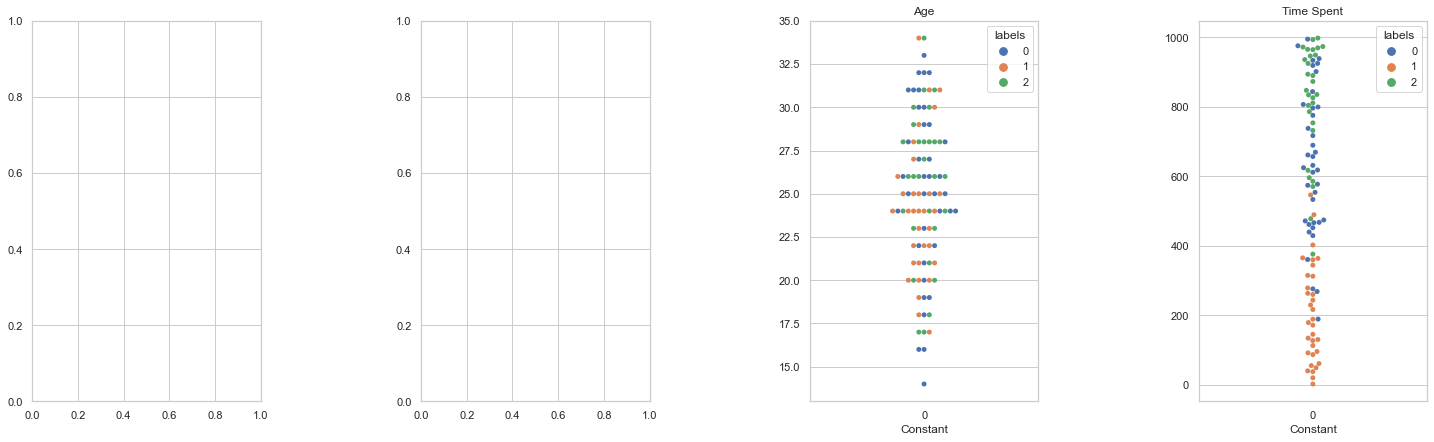

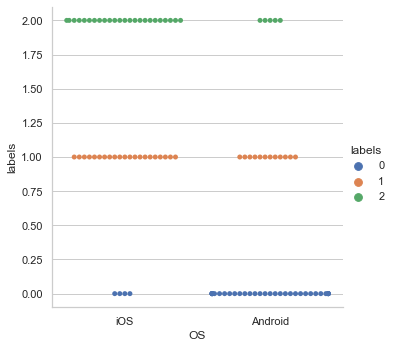

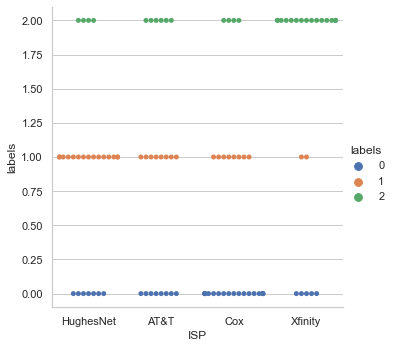

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

labeledCustomers['Constant'] = 0 #dummy feature for plotting

f, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(4):
    col = labeledCustomers.columns[i]
    if i < 2:    
        sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledCustomers,ax=axes[i])
    else:
        ax = sns.swarmplot(x=labeledCustomers['Constant'],y=labeledCustomers[col].values,hue=labeledCustomers['labels'],ax=axes[i])
        ax.set_title(col)
        
# plt.close(2)
plt.ion()
# plt.close(3)
plt.show()

In [224]:
from sklearn.preprocessing import PowerTransformer

In [233]:
dfPost.isnull().sum()

yearsInvesting         0
investmentHoldings     0
lastTXN                0
offerNames             0
signUpDate             0
broker                 0
firstOffer             0
clientSource           0
confidence             0
numOffers              0
TTV                    0
age                    0
avgSubscribedAmount    0
dtype: int64

In [243]:
# for k in dfPre["signUpDate"]:
# #     print(str(k))

offerNamesList = []
count = 0
activeList = []
for k in dfPre["offerNames"]:
#     print(str(k))
    if "-" in str(k) and "," in str(k):
        activeList.append(count)
        offerNamesList.append(str(k))
    count += 1
print(offerNamesList)

['2022-03-02-EOG, 2021-12-13-ZNWD, 2021-03-21-ROO', '2021-11-18-LMP, 2021-11-11-AGR, 2021-11-08-SRE, 2021-09-29-BBOX, 2021-05-19-SVT, 2021-04-07-JIM, 2021-03-17-CWR, 2021-02-11-JET2, 2020-12-10-ECM, 2020-11-18-CRDA, 2020-11-11-RCDO, 2020-06-17-TW, 2020-06-16-WMH, 2020-06-10-OCDO, 2020-06-09-SGRO, 2020-06-04-AVCT, 2020-06-03-SSPG, 2020-05-19-CPG, 2017-03-31-CERP', '2021-12-13-ZNWD, 2021-03-21-ROO', '2022-05-10-DUKE, 2022-03-02-EOG, 2021-12-01-HFD, 2021-11-18-GBG, 2021-07-15-SRC, 2021-07-07-I3E, 2021-06-14-GROW, 2021-05-26-MTW, 2021-04-07-JIM, 2021-03-17-CWR, 2021-03-08-ARB, 2021-02-25-YCA, 2021-02-24-APF, 2021-02-15-CBX', '2021-03-21-ROO, 2021-02-15-CBX', '2022-04-07-SUPR, 2021-10-04-SUPR, 2021-09-29-BBOX, 2021-09-20-GSF, 2021-06-24-LXI, 2021-03-21-ROO, 2021-03-04-SUPR, 2021-03-08-ARB, 2021-03-01-CALL, 2020-10-28-KAPE, 2020-09-21-SUPR, 2020-06-19-GSF', '2021-02-24-APF, 2021-02-15-CBX', '2021-09-13-KAPE, 2021-04-27-SOLG, 2021-03-21-ROO, 2021-03-15-MEAL, 2021-01-26-AGM, 2020-12-01-TGR, 20

In [244]:
#looking at users who have made at least one deal only
count = 0
yearsInvestingList = []
investmentHoldingsList = []
lastTXNList = []
# offerNamesList = []
signUpDateList = []
brokerList = []
firstOfferList = []
clientSourceList = []
confidenceList = []
numOffersList = []
TTVList = []
ageList = []
avgSubscribedAmountList = []

for k in dfPre['yearsInvesting']:
    if count in activeList:
        yearsInvestingList.append(str(k))
    count += 1
count = 0
for k in dfPre['investmentHoldings']:
    if count in activeList:
        investmentHoldingsList.append(str(k))
    count += 1
count = 0
for k in dfPre['lastTXN']:
    if count in activeList:
        lastTXNList.append(str(k))
    count += 1
count = 0
for k in dfNew['signUpDate']:
    if count in activeList:
        signUpDateList.append(str(k))
    count += 1
count = 0
for k in dfPre['broker']:
    if count in activeList:
        brokerList.append(str(k))
    count += 1
count = 0
for k in dfPre['firstOffer']:
    if count in activeList:
        firstOfferList.append(str(k))
    count += 1
count = 0
for k in dfPre['clientSource']:
    if count in activeList:
        clientSourceList.append(str(k))
    count += 1
count = 0
for k in dfPre['confidence']:
    if count in activeList:
        confidenceList.append(float(k))
    count += 1
count = 0
for k in dfPre['numOffers']:
    if count in activeList:
        numOffersList.append(float(k))
    count += 1
count = 0
for k in dfPre['TTV']:
    if count in activeList:
        TTVList.append(float(k))
    count += 1
count = 0
for k in dfPre['age']:
    if count in activeList:
        ageList.append(float(k))
    count += 1
count = 0
for k in dfPre['avgSubscribedAmount']:
    if count in activeList:
        avgSubscribedAmountList.append(float(k))
    count += 1
count = 0       
#     count +=1

In [245]:
dfPreActive = pd.DataFrame()
dfPreActive["yearsInvesting"] = yearsInvestingList
dfPreActive["investmentHoldings"] = investmentHoldingsList
dfPreActive["lastTXN"] = lastTXNList
dfPreActive["offerNames"] = offerNamesList
dfPreActive["signUpDate"] = signUpDateList
dfPreActive["broker"] = brokerList
dfPreActive["firstOffer"] = firstOfferList
dfPreActive["clientSource"] = clientSourceList
dfPreActive["confidence"] = confidenceList
dfPreActive["numOffers"] = numOffersList
dfPreActive["TTV"] = TTVList
dfPreActive["age"] = ageList
dfPreActive["avgSubscribedAmount"] = avgSubscribedAmountList


In [250]:
offerNamesList = []
count = 0
activeList = []
for k in dfPost["offerNames"]:
#     print(str(k))
    if "-" in str(k):
        activeList.append(count)
        offerNamesList.append(str(k))
    count += 1
print(offerNamesList)

['2022-04-05-ENQ2, 2022-04-05-ECO, 2022-04-04-BKS, 2022-01-28-OXB, 2021-12-08-ATOM, 2021-12-13-ZNWD, 2021-10-28-FSF', '2021-03-21-ROO', '2022-04-05-ECO, 2021-12-07-PANR, 2021-12-01-HFD, 2021-12-01-ABDX, 2021-11-05-UKW, 2021-11-22-HARL, 2021-11-18-GGP, 2021-11-11-AGR', '2022-03-30-GSF, 2022-03-30-1SN, 2021-12-01-CHRY, 2021-11-05-UKW, 2021-11-03-ROOF, 2021-10-28-FSF, 2021-10-08-DORE', '2021-10-21-HEIT, 2021-07-12-HGEN', '2021-11-22-TLEP', '2021-07-13-TERN, 2021-07-05-FWD, 2021-07-09-IKA, 2021-05-24-DGI9, 2021-05-28-EQT', '2021-12-13-ZNWD, 2021-12-07-PANR', '2021-03-21-ROO', '2021-03-21-ROO', '2021-03-21-ROO', '2021-03-21-ROO', '2022-01-28-OXB, 2021-11-22-TLEP, 2021-11-18-LMP, 2021-10-28-FSF, 2021-11-02-PROC, 2021-10-08-DORE, 2021-09-29-BBOX, 2021-09-10-ASLI, 2021-09-20-GSF, 2021-09-03-HOME, 2021-09-20-HAYD, 2021-08-31-TRIG, 2021-07-05-FWD, 2021-06-30-SHED, 2021-06-24-LXI, 2021-03-21-ROO', '2021-07-09-IKA', '2021-03-21-ROO', '2022-01-28-OXB, 2021-12-13-ZNWD, 2021-03-21-ROO', '2022-04-07-S

In [247]:
#looking at users who have made at least one deal only
count = 0
yearsInvestingList = []
investmentHoldingsList = []
lastTXNList = []
# offerNamesList = []
signUpDateList = []
brokerList = []
firstOfferList = []
clientSourceList = []
confidenceList = []
numOffersList = []
TTVList = []
ageList = []
avgSubscribedAmountList = []

for k in dfPost['yearsInvesting']:
    if count in activeList:
        yearsInvestingList.append(str(k))
    count += 1
count = 0
for k in dfPost['investmentHoldings']:
    if count in activeList:
        investmentHoldingsList.append(str(k))
    count += 1
count = 0
for k in dfPost['lastTXN']:
    if count in activeList:
        lastTXNList.append(str(k))
    count += 1
count = 0
for k in dfPost['signUpDate']:
    if count in activeList:
        signUpDateList.append(str(k))
    count += 1
count = 0
for k in dfPost['broker']:
    if count in activeList:
        brokerList.append(str(k))
    count += 1
count = 0
for k in dfPost['firstOffer']:
    if count in activeList:
        firstOfferList.append(str(k))
    count += 1
count = 0
for k in dfPost['clientSource']:
    if count in activeList:
        clientSourceList.append(str(k))
    count += 1
count = 0
for k in dfPost['confidence']:
    if count in activeList:
        confidenceList.append(float(k))
    count += 1
count = 0
for k in dfPost['numOffers']:
    if count in activeList:
        numOffersList.append(float(k))
    count += 1
count = 0
for k in dfPost['TTV']:
    if count in activeList:
        TTVList.append(float(k))
    count += 1
count = 0
for k in dfPost['age']:
    if count in activeList:
        ageList.append(float(k))
    count += 1
count = 0
for k in dfPost['avgSubscribedAmount']:
    if count in activeList:
        avgSubscribedAmountList.append(float(k))
    count += 1
count = 0       
#     count +=1

In [249]:
dfPostActive = pd.DataFrame()
dfPostActive["yearsInvesting"] = yearsInvestingList
dfPostActive["investmentHoldings"] = investmentHoldingsList
dfPostActive["lastTXN"] = lastTXNList
dfPostActive["offerNames"] = offerNamesList
dfPostActive["signUpDate"] = signUpDateList
dfPostActive["broker"] = brokerList
dfPostActive["firstOffer"] = firstOfferList
dfPostActive["clientSource"] = clientSourceList
dfPostActive["confidence"] = confidenceList
dfPostActive["numOffers"] = numOffersList
dfPostActive["TTV"] = TTVList
dfPostActive["age"] = ageList
dfPostActive["avgSubscribedAmount"] = avgSubscribedAmountList


In [256]:
offerNamesList = []
count = 0
inactiveList = []
for k in dfPre["offerNames"]:
#     print(str(k))
    if "-" not in str(k) or "," not in str(k):
        inactiveList.append(count)
        offerNamesList.append(str(k))
    count += 1
print(offerNamesList)

['NA', 'NA', 'NA', 'NA', '2021-06-21-AUGM', '2019-12-20-FUM', 'NA', '2021-02-15-CBX', 'NA', '2022-03-30-GSF', '2021-02-15-CBX', '2022-03-30-GSF', '2021-07-12-HGEN', 'NA', 'NA', '2021-02-24-APF', '2021-03-21-ROO', 'NA', '2020-06-10-OCDO', 'NA', 'NA', '2021-02-15-CBX', 'NA', '2021-02-15-CBX', '2020-07-02-SONG', '2020-07-22-CSP', 'NA', 'NA', 'NA', '2021-02-15-CBX', 'NA', 'NA', 'NA', 'NA', '2021-02-15-CBX', '2021-02-15-CBX', 'NA', 'NA', 'NA', 'NA', 'NA', '2020-07-02-SONG', '2021-05-19-SVT', '2021-04-12-PBEE', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2021-02-15-CBX', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2021-02-02-BCN', '2021-02-15-CBX', 'NA', '2021-02-15-CBX', '2021-03-15-MEAL', '2021-03-19-TRR', '2021-02-15-CBX', 'NA', '2021-02-15-CBX', '2021-02-15-CBX', 'NA', '2021-03-31-DUKE', '2021-02-15-CBX', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2021-03-19-TRR', '2020-05-27-IWG', '2021-02-15-CBX', '2020-06-29-K3C', '2021-02-15-CBX', '2021-02-15-CBX', 'NA', 'NA', 'NA', '2021-02-15-CBX', 'NA', '

In [252]:
#looking at users who have made at least one deal only
count = 0
yearsInvestingList = []
investmentHoldingsList = []
lastTXNList = []
# offerNamesList = []
signUpDateList = []
brokerList = []
firstOfferList = []
clientSourceList = []
confidenceList = []
numOffersList = []
TTVList = []
ageList = []
avgSubscribedAmountList = []

for k in dfPre['yearsInvesting']:
    if count in inactiveList:
        yearsInvestingList.append(str(k))
    count += 1
count = 0
for k in dfPre['investmentHoldings']:
    if count in inactiveList:
        investmentHoldingsList.append(str(k))
    count += 1
count = 0
for k in dfPre['lastTXN']:
    if count in inactiveList:
        lastTXNList.append(str(k))
    count += 1
count = 0
for k in dfNew['signUpDate']:
    if count in inactiveList:
        signUpDateList.append(str(k))
    count += 1
count = 0
for k in dfPre['broker']:
    if count in inactiveList:
        brokerList.append(str(k))
    count += 1
count = 0
for k in dfPre['firstOffer']:
    if count in inactiveList:
        firstOfferList.append(str(k))
    count += 1
count = 0
for k in dfPre['clientSource']:
    if count in inactiveList:
        clientSourceList.append(str(k))
    count += 1
count = 0
for k in dfPre['confidence']:
    if count in inactiveList:
        confidenceList.append(float(k))
    count += 1
count = 0
for k in dfPre['numOffers']:
    if count in inactiveList:
        numOffersList.append(float(k))
    count += 1
count = 0
for k in dfPre['TTV']:
    if count in inactiveList:
        TTVList.append(float(k))
    count += 1
count = 0
for k in dfPre['age']:
    if count in inactiveList:
        ageList.append(float(k))
    count += 1
count = 0
for k in dfPre['avgSubscribedAmount']:
    if count in inactiveList:
        avgSubscribedAmountList.append(float(k))
    count += 1
count = 0       
#     count +=1

In [253]:
dfPreInactive = pd.DataFrame()
dfPreInactive["yearsInvesting"] = yearsInvestingList
dfPreInactive["investmentHoldings"] = investmentHoldingsList
dfPreInactive["lastTXN"] = lastTXNList
dfPreInactive["offerNames"] = offerNamesList
dfPreInactive["signUpDate"] = signUpDateList
dfPreInactive["broker"] = brokerList
dfPreInactive["firstOffer"] = firstOfferList
dfPreInactive["clientSource"] = clientSourceList
dfPreInactive["confidence"] = confidenceList
dfPreInactive["numOffers"] = numOffersList
dfPreInactive["TTV"] = TTVList
dfPreInactive["age"] = ageList
dfPreInactive["avgSubscribedAmount"] = avgSubscribedAmountList

In [280]:
dfPreActive.head()

yearsInvesting     investmentHoldings     lastTXN  \
0                    3 to 5 years     ¬£50,000-¬£249,999  2022-03-02   
1                10 or more years      Prefer not to say  2021-11-18   
2  I work in the financial sector          Under ¬£5,000  2021-12-13   
3                10 or more years  ¬£500,000-¬£2,499,999  2022-05-10   
4                   6 to 10 years     ¬£50,000-¬£249,999  2021-03-28   

                                          offerNames  signUpDate  \
0    2022-03-02-EOG, 2021-12-13-ZNWD, 2021-03-21-ROO  2022-01-28   
1  2021-11-18-LMP, 2021-11-11-AGR, 2021-11-08-SRE...  2021-02-27   
2                    2021-12-13-ZNWD, 2021-03-21-ROO  2021-03-30   
3  2022-05-10-DUKE, 2022-03-02-EOG, 2021-12-01-HF...  2021-11-12   
4                     2021-03-21-ROO, 2021-02-15-CBX  2021-02-25   

                    broker      firstOffer clientSource  confidence  \
0      Hargreaves Lansdown             N/A       Mobile         3.0   
1                       IG             N/A      Unknown         5.0   
2  Barclays Smart Investor             N/A          Web         4.0   
3        AJ Bell YouInvest  2021-02-15-CBX          Web         5.0   
4     Interactive Investor  2021-02-15-CBX          Web         4.0   

   numOffers       TTV   age  avgSubscribedAmount  
0        3.0   2498.26  43.0              2498.26  
1       19.0      0.00  61.0                 0.00  
2        2.0    749.06  45.0               749.06  
3       14.0  99216.68  61.0             99216.68  
4        2.0   1498.40  38.0              1498.40

In [281]:
dfPostActive.head()

yearsInvesting     investmentHoldings     lastTXN  \
0     6 to 10 years  ¬£500,000-¬£2,499,999  2022-04-20   
1     6 to 10 years       ¬£5,000-¬£24,999  2021-03-23   
2      3 to 5 years      Prefer not to say  2022-04-05   
3      3 to 5 years     ¬£50,000-¬£249,999  2022-04-12   
4  10 or more years    ¬£250,000-¬£499,999  2021-11-03   

                                          offerNames  signUpDate  \
0  2022-04-05-ENQ2, 2022-04-05-ECO, 2022-04-04-BK...  2021-11-12   
1                                     2021-03-21-ROO  2021-03-15   
2  2022-04-05-ECO, 2021-12-07-PANR, 2021-12-01-HF...  2021-11-11   
3  2022-03-30-GSF, 2022-03-30-1SN, 2021-12-01-CHR...  2021-03-10   
4                   2021-10-21-HEIT, 2021-07-12-HGEN  2021-04-17   

                broker      firstOffer                clientSource  \
0    AJ Bell YouInvest  2021-10-28-FSF                      Mobile   
1                   NA  2021-03-21-ROO  Retail One-off Transaction   
2  Hargreaves Lansdown  2021-11-11-AGR                      Mobile   
3  Hargreaves Lansdown  2021-03-21-ROO  Retail One-off Transaction   
4  Hargreaves Lansdown             N/A                         Web   

   confidence  numOffers       TTV   age  avgSubscribedAmount  
0         4.0        7.0  14493.82  58.0             14493.82  
1         4.0        1.0    998.40  47.0               998.40  
2         4.0        8.0  26623.32  56.0             26623.32  
3         4.0        7.0  13445.48  55.0             13445.48  
4         4.0        2.0  10000.00  80.0             10000.00

In [ ]:
#binnings pre web post web
#make binary post or pre (y or n)
#read in that coloumn instead of all the dates
#drop all variables that can't be put together (dates)
#used binned versions of age and num
#Make another column with type of user, super, average, etc.
#